# 캐글 산탄데르 고객 만족 예측
* 370개의 피처로 주어진 데이터 세트 기반에서 고객 만족 여부를 예측하는 문제
* 평가 지표 = ROC-AUC
    * 대부분이 만족이고 불만족인 데이터가 일부일 것이므로 정확도보다는 ROC-AUC가 더 적합

### 데이터 전처리

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import matplotlib

cust_df = pd.read_csv("./train_santander.csv", encoding='latin-1')
print('dataset shape:', cust_df.shape)
cust_df.head(3)

dataset shape: (76020, 371)


,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,...,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38,TARGET
0,1,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,39205.17,0
1,3,2,34,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,49278.03,0
2,4,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,67333.77,0


In [2]:
# 317개 column 중에 111개는 float64형, 260개는 int64형
# null 값은 없음

cust_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76020 entries, 0 to 76019
Columns: 371 entries, ID to TARGET
dtypes: float64(111), int64(260)
memory usage: 215.2 MB


In [3]:
# 1 = 불만족 고객, 0 = 만족 고객

print(cust_df['TARGET'].value_counts())
unsatisfied_cnt = cust_df[cust_df['TARGET'] == 1].TARGET.count()
total_cnt = cust_df.TARGET.count()
print('unsatisfied 비율은 {0:.2f}'.format((unsatisfied_cnt / total_cnt)))

0    73012
1     3008
Name: TARGET, dtype: int64
unsatisfied 비율은 0.04


In [4]:
# min(var3) = -999999
# NaN이나 특정 예외 값을 변환한 것으로 추정
cust_df.describe()

,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,...,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38,TARGET
count,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,...,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,7.602000e+04,76020.000000
mean,75964.050723,-1523.199277,33.212865,86.208265,72.363067,119.529632,3.559130,6.472698,0.412946,0.567352,...,7.935824,1.365146,12.215580,8.784074,31.505324,1.858575,76.026165,56.614351,1.172358e+05,0.039569
std,43781.947379,39033.462364,12.956486,1614.757313,339.315831,546.266294,93.155749,153.737066,30.604864,36.513513,...,455.887218,113.959637,783.207399,538.439211,2013.125393,147.786584,4040.337842,2852.579397,1.826646e+05,0.194945
min,1.000000,-999999.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.163750e+03,0.000000
25%,38104.750000,2.000000,23.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.787061e+04,0.000000
50%,76043.000000,2.000000,28.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.064092e+05,0.000000
75%,113748.750000,2.000000,40.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.187563e+05,0.000000
max,151838.000000,238.000000,105.000000,210000.000000,12888.030000,21024.810000,8237.820000,11073.570000,6600.000000,6600.000000,...,50003.880000,20385.720000,138831.630000,91778.730000,438329.220000,24650.010000,681462.900000,397884.300000,2.203474e+07,1.000000


In [5]:
# var3 피처 값 대체 및 ID 피처 드롭
cust_df['var3'].replace(-999999, 2, inplace=True) # 가장 많은 값인 2로 대체
cust_df.drop('ID', axis=1, inplace=True)

# 피처 세트와 레이블 세트분리. 레이블 컬럼은 DataFrame의 맨 마지막에 위치해 컬럼 위치 -1로 분리
X_features = cust_df.iloc[:, :-1]
y_labels = cust_df.iloc[:, -1]
print('피처 데이터 shape:{0}'.format(X_features.shape))

피처 데이터 shape:(76020, 369)


In [6]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_features, y_labels,
                                                    test_size=0.2, random_state=0)
train_cnt = y_train.count()
test_cnt = y_test.count()
print('학습 세트 Shape:{0}, 테스트 세트 Shape:{1}'.format(X_train.shape, X_test.shape))

# 학습 세트와 테스트 세트 모두 target 값의 분포가 원본 데이터와 비슷하게 4%로 만들어진 것을 확인
print('\n 학습 세트 레이블 값 분포 비율')
print(y_train.value_counts() / train_cnt)
print('\n 테스트 세트 레이블 값 분포 비율')
print(y_test.value_counts() / test_cnt)

학습 세트 Shape:(60816, 369), 테스트 세트 Shape:(15204, 369)

 학습 세트 레이블 값 분포 비율
0    0.960964
1    0.039036
Name: TARGET, dtype: float64

 테스트 세트 레이블 값 분포 비율
0    0.9583
1    0.0417
Name: TARGET, dtype: float64


In [7]:
from xgboost import XGBClassifier # 사이킷런 래퍼
from sklearn.metrics import roc_auc_score

# n_estimators는 500으로, random state는 예제 수행 시마다 동일 예측 결과를 위해 설정. 
xgb_clf = XGBClassifier(n_estimators=500, random_state=156)

# 성능 평가 지표를 auc로, 조기 중단 파라미터는 100으로 설정하고 학습 수행. 
xgb_clf.fit(X_train, y_train, early_stopping_rounds=100,
            eval_metric="auc", eval_set=[(X_train, y_train), (X_test, y_test)])

xgb_roc_score = roc_auc_score(y_test, xgb_clf.predict_proba(X_test)[:,1], average='macro')
print('ROC AUC: {0:.4f}'.format(xgb_roc_score))

/Users/euhan3/opt/anaconda3/envs/ml_study/lib/python3.9/site-packages/xgboost/compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
/Users/euhan3/opt/anaconda3/envs/ml_study/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Users/euhan3/opt/anaconda3/envs/ml_study/lib/python3.9/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate d

[0]	validation_0-auc:0.82005	validation_1-auc:0.81157
[1]	validation_0-auc:0.83400	validation_1-auc:0.82452
[2]	validation_0-auc:0.83870	validation_1-auc:0.82746
[3]	validation_0-auc:0.84419	validation_1-auc:0.82922
[4]	validation_0-auc:0.84783	validation_1-auc:0.83298
[5]	validation_0-auc:0.85125	validation_1-auc:0.83500
[6]	validation_0-auc:0.85501	validation_1-auc:0.83653
[7]	validation_0-auc:0.85831	validation_1-auc:0.83782
[8]	validation_0-auc:0.86143	validation_1-auc:0.83802
[9]	validation_0-auc:0.86452	validation_1-auc:0.83914
[10]	validation_0-auc:0.86717	validation_1-auc:0.83954
[11]	validation_0-auc:0.87013	validation_1-auc:0.83983
[12]	validation_0-auc:0.87369	validation_1-auc:0.84033
[13]	validation_0-auc:0.87620	validation_1-auc:0.84054
[14]	validation_0-auc:0.87799	validation_1-auc:0.84135
[15]	validation_0-auc:0.88072	validation_1-auc:0.84117
[16]	validation_0-auc:0.88238	validation_1-auc:0.84101
[17]	validation_0-auc:0.88354	validation_1-auc:0.84071
[18]	validation_0-au

In [8]:
from sklearn.model_selection import GridSearchCV

# 하이퍼 파라미터 테스트의 수행 속도를 향상시키기 위해 n_estimators를 100으로 감소
xgb_clf = XGBClassifier(n_estimators=100)

params = {'max_depth':[5, 7], 'min_child_weight':[1, 3], 'colsample_bytree':[0.5, 0.75]}

# 하이퍼 파라미터 테스트의 수행속도를 향상 시키기 위해 cv를 지정하지 않음. 
gridcv = GridSearchCV(xgb_clf, param_grid=params)
gridcv.fit(X_train, y_train, early_stopping_rounds=30, eval_metric="auc",
           eval_set=[(X_train, y_train), (X_test, y_test)])

print('GridSearchCV 최적 파라미터:', gridcv.best_params_) 

xgb_roc_score = roc_auc_score(y_test, gridcv.predict_proba(X_test)[:,1], average='macro')
print('ROC AUC: {0:.4f}'.format(xgb_roc_score))

/Users/euhan3/opt/anaconda3/envs/ml_study/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Users/euhan3/opt/anaconda3/envs/ml_study/lib/python3.9/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[0]	validation_0-auc:0.72255	validation_1-auc:0.72640
[1]	validation_0-auc:0.74625	validation_1-auc:0.75051
[2]	validation_0-auc:0.81675	validation_1-auc:0.81906
[3]	validation_0-auc:0.82734	validation_1-auc:0.82620
[4]	validation_0-auc:0.83559	validation_1-auc:0.83410
[5]	validation_0-auc:0.83854	validation_1-auc:0.83449
[6]	validation_0-auc:0.83653	validation_1-auc:0.83319
[7]	validation_0-auc:0.84281	validation_1-auc:0.83717
[8]	validation_0-auc:0.84240	validation_1-auc:0.83435
[9]	validation_0-auc:0.84139	validation_1-auc:0.83315
[10]	validation_0-auc:0.84795	validation_1-auc:0.83874
[11]	validation_0-auc:0.85113	validation_1-auc:0.84039
[12]	validation_0-auc:0.85300	validation_1-auc:0.84080
[13]	validation_0-auc:0.85370	validation_1-auc:0.84205
[14]	validation_0-auc:0.85535	validation_1-auc:0.84046
[15]	validation_0-auc:0.85837	validation_1-auc:0.84232
[16]	validation_0-auc:0.85907	validation_1-auc:0.84237
[17]	validation_0-auc:0.86128	validation_1-auc:0.84349
[18]	validation_0-au

/Users/euhan3/opt/anaconda3/envs/ml_study/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Users/euhan3/opt/anaconda3/envs/ml_study/lib/python3.9/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[0]	validation_0-auc:0.70777	validation_1-auc:0.71616
[1]	validation_0-auc:0.73724	validation_1-auc:0.74060
[2]	validation_0-auc:0.81563	validation_1-auc:0.81740
[3]	validation_0-auc:0.82812	validation_1-auc:0.82909
[4]	validation_0-auc:0.83599	validation_1-auc:0.83365
[5]	validation_0-auc:0.83874	validation_1-auc:0.83416
[6]	validation_0-auc:0.83636	validation_1-auc:0.83476
[7]	validation_0-auc:0.84421	validation_1-auc:0.83623
[8]	validation_0-auc:0.84338	validation_1-auc:0.83352
[9]	validation_0-auc:0.84075	validation_1-auc:0.83271
[10]	validation_0-auc:0.84952	validation_1-auc:0.83787
[11]	validation_0-auc:0.85314	validation_1-auc:0.84149
[12]	validation_0-auc:0.85506	validation_1-auc:0.84169
[13]	validation_0-auc:0.85601	validation_1-auc:0.84186
[14]	validation_0-auc:0.85704	validation_1-auc:0.84189
[15]	validation_0-auc:0.85958	validation_1-auc:0.84255
[16]	validation_0-auc:0.85999	validation_1-auc:0.84220
[17]	validation_0-auc:0.86150	validation_1-auc:0.84348
[18]	validation_0-au

/Users/euhan3/opt/anaconda3/envs/ml_study/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Users/euhan3/opt/anaconda3/envs/ml_study/lib/python3.9/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[0]	validation_0-auc:0.71427	validation_1-auc:0.72188
[1]	validation_0-auc:0.74087	validation_1-auc:0.74421
[2]	validation_0-auc:0.81713	validation_1-auc:0.81760
[3]	validation_0-auc:0.82914	validation_1-auc:0.82649
[4]	validation_0-auc:0.83644	validation_1-auc:0.83559
[5]	validation_0-auc:0.84168	validation_1-auc:0.83747
[6]	validation_0-auc:0.83967	validation_1-auc:0.83644
[7]	validation_0-auc:0.84644	validation_1-auc:0.84031
[8]	validation_0-auc:0.84500	validation_1-auc:0.83784
[9]	validation_0-auc:0.84307	validation_1-auc:0.83670
[10]	validation_0-auc:0.84964	validation_1-auc:0.83927
[11]	validation_0-auc:0.85238	validation_1-auc:0.84193
[12]	validation_0-auc:0.85578	validation_1-auc:0.84339
[13]	validation_0-auc:0.85755	validation_1-auc:0.84287
[14]	validation_0-auc:0.85835	validation_1-auc:0.84120
[15]	validation_0-auc:0.86158	validation_1-auc:0.84214
[16]	validation_0-auc:0.86200	validation_1-auc:0.84192
[17]	validation_0-auc:0.86404	validation_1-auc:0.84256
[18]	validation_0-au

/Users/euhan3/opt/anaconda3/envs/ml_study/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Users/euhan3/opt/anaconda3/envs/ml_study/lib/python3.9/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[0]	validation_0-auc:0.70172	validation_1-auc:0.71158
[1]	validation_0-auc:0.73534	validation_1-auc:0.74277
[2]	validation_0-auc:0.81703	validation_1-auc:0.81887
[3]	validation_0-auc:0.82942	validation_1-auc:0.82872
[4]	validation_0-auc:0.83715	validation_1-auc:0.83600
[5]	validation_0-auc:0.84120	validation_1-auc:0.83456
[6]	validation_0-auc:0.84036	validation_1-auc:0.83646
[7]	validation_0-auc:0.84565	validation_1-auc:0.83754
[8]	validation_0-auc:0.84538	validation_1-auc:0.83804
[9]	validation_0-auc:0.84352	validation_1-auc:0.83600
[10]	validation_0-auc:0.84964	validation_1-auc:0.84041
[11]	validation_0-auc:0.85322	validation_1-auc:0.84252
[12]	validation_0-auc:0.85662	validation_1-auc:0.84253
[13]	validation_0-auc:0.85735	validation_1-auc:0.84213
[14]	validation_0-auc:0.85876	validation_1-auc:0.84083
[15]	validation_0-auc:0.86128	validation_1-auc:0.84240
[16]	validation_0-auc:0.86235	validation_1-auc:0.84146
[17]	validation_0-auc:0.86367	validation_1-auc:0.84172
[18]	validation_0-au

/Users/euhan3/opt/anaconda3/envs/ml_study/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Users/euhan3/opt/anaconda3/envs/ml_study/lib/python3.9/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[0]	validation_0-auc:0.71927	validation_1-auc:0.72073
[1]	validation_0-auc:0.74590	validation_1-auc:0.74597
[2]	validation_0-auc:0.81912	validation_1-auc:0.81581
[3]	validation_0-auc:0.83168	validation_1-auc:0.82750
[4]	validation_0-auc:0.83887	validation_1-auc:0.83347
[5]	validation_0-auc:0.84086	validation_1-auc:0.83313
[6]	validation_0-auc:0.84075	validation_1-auc:0.83430
[7]	validation_0-auc:0.84752	validation_1-auc:0.83714
[8]	validation_0-auc:0.84712	validation_1-auc:0.83559
[9]	validation_0-auc:0.84642	validation_1-auc:0.83511
[10]	validation_0-auc:0.85265	validation_1-auc:0.83900
[11]	validation_0-auc:0.85589	validation_1-auc:0.84162
[12]	validation_0-auc:0.85824	validation_1-auc:0.84340
[13]	validation_0-auc:0.85939	validation_1-auc:0.84525
[14]	validation_0-auc:0.86086	validation_1-auc:0.84460
[15]	validation_0-auc:0.86385	validation_1-auc:0.84506
[16]	validation_0-auc:0.86416	validation_1-auc:0.84467
[17]	validation_0-auc:0.86574	validation_1-auc:0.84515
[18]	validation_0-au

/Users/euhan3/opt/anaconda3/envs/ml_study/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Users/euhan3/opt/anaconda3/envs/ml_study/lib/python3.9/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[0]	validation_0-auc:0.72246	validation_1-auc:0.72509
[1]	validation_0-auc:0.74499	validation_1-auc:0.75002
[2]	validation_0-auc:0.81724	validation_1-auc:0.82145
[3]	validation_0-auc:0.82773	validation_1-auc:0.82776
[4]	validation_0-auc:0.83538	validation_1-auc:0.83561
[5]	validation_0-auc:0.83807	validation_1-auc:0.83561
[6]	validation_0-auc:0.83569	validation_1-auc:0.83282
[7]	validation_0-auc:0.84205	validation_1-auc:0.83616
[8]	validation_0-auc:0.84198	validation_1-auc:0.83349
[9]	validation_0-auc:0.84127	validation_1-auc:0.83382
[10]	validation_0-auc:0.84884	validation_1-auc:0.83811
[11]	validation_0-auc:0.85108	validation_1-auc:0.83911
[12]	validation_0-auc:0.85420	validation_1-auc:0.83954
[13]	validation_0-auc:0.85547	validation_1-auc:0.83978
[14]	validation_0-auc:0.85666	validation_1-auc:0.84062
[15]	validation_0-auc:0.85894	validation_1-auc:0.84120
[16]	validation_0-auc:0.85959	validation_1-auc:0.84202
[17]	validation_0-auc:0.86037	validation_1-auc:0.84296
[18]	validation_0-au

/Users/euhan3/opt/anaconda3/envs/ml_study/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Users/euhan3/opt/anaconda3/envs/ml_study/lib/python3.9/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[0]	validation_0-auc:0.70779	validation_1-auc:0.71610
[1]	validation_0-auc:0.73759	validation_1-auc:0.74109
[2]	validation_0-auc:0.81661	validation_1-auc:0.81699
[3]	validation_0-auc:0.82893	validation_1-auc:0.82693
[4]	validation_0-auc:0.83925	validation_1-auc:0.83530
[5]	validation_0-auc:0.84113	validation_1-auc:0.83429
[6]	validation_0-auc:0.83799	validation_1-auc:0.83587
[7]	validation_0-auc:0.84605	validation_1-auc:0.83828
[8]	validation_0-auc:0.84472	validation_1-auc:0.83692
[9]	validation_0-auc:0.84182	validation_1-auc:0.83535
[10]	validation_0-auc:0.85005	validation_1-auc:0.84039
[11]	validation_0-auc:0.85399	validation_1-auc:0.84213
[12]	validation_0-auc:0.85670	validation_1-auc:0.84097
[13]	validation_0-auc:0.85702	validation_1-auc:0.84211
[14]	validation_0-auc:0.85732	validation_1-auc:0.84099
[15]	validation_0-auc:0.85968	validation_1-auc:0.84301
[16]	validation_0-auc:0.86035	validation_1-auc:0.84265
[17]	validation_0-auc:0.86110	validation_1-auc:0.84335
[18]	validation_0-au

/Users/euhan3/opt/anaconda3/envs/ml_study/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Users/euhan3/opt/anaconda3/envs/ml_study/lib/python3.9/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[0]	validation_0-auc:0.71437	validation_1-auc:0.72210
[1]	validation_0-auc:0.74281	validation_1-auc:0.74540
[2]	validation_0-auc:0.81691	validation_1-auc:0.81803
[3]	validation_0-auc:0.83137	validation_1-auc:0.82920
[4]	validation_0-auc:0.83715	validation_1-auc:0.83594
[5]	validation_0-auc:0.84106	validation_1-auc:0.83723
[6]	validation_0-auc:0.83892	validation_1-auc:0.83622
[7]	validation_0-auc:0.84542	validation_1-auc:0.83992
[8]	validation_0-auc:0.84442	validation_1-auc:0.83734
[9]	validation_0-auc:0.84358	validation_1-auc:0.83561
[10]	validation_0-auc:0.84903	validation_1-auc:0.83870
[11]	validation_0-auc:0.85261	validation_1-auc:0.83992
[12]	validation_0-auc:0.85494	validation_1-auc:0.84113
[13]	validation_0-auc:0.85628	validation_1-auc:0.84036
[14]	validation_0-auc:0.85713	validation_1-auc:0.83931
[15]	validation_0-auc:0.86043	validation_1-auc:0.84060
[16]	validation_0-auc:0.86067	validation_1-auc:0.84040
[17]	validation_0-auc:0.86185	validation_1-auc:0.84137
[18]	validation_0-au

/Users/euhan3/opt/anaconda3/envs/ml_study/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Users/euhan3/opt/anaconda3/envs/ml_study/lib/python3.9/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[0]	validation_0-auc:0.70210	validation_1-auc:0.71087
[1]	validation_0-auc:0.73511	validation_1-auc:0.74116
[2]	validation_0-auc:0.81665	validation_1-auc:0.81791
[3]	validation_0-auc:0.83071	validation_1-auc:0.82852
[4]	validation_0-auc:0.83880	validation_1-auc:0.83467
[5]	validation_0-auc:0.84100	validation_1-auc:0.83436
[6]	validation_0-auc:0.83889	validation_1-auc:0.83227
[7]	validation_0-auc:0.84578	validation_1-auc:0.83524
[8]	validation_0-auc:0.84480	validation_1-auc:0.83296
[9]	validation_0-auc:0.84215	validation_1-auc:0.83120
[10]	validation_0-auc:0.84798	validation_1-auc:0.83512
[11]	validation_0-auc:0.85125	validation_1-auc:0.83798
[12]	validation_0-auc:0.85447	validation_1-auc:0.83909
[13]	validation_0-auc:0.85540	validation_1-auc:0.83949
[14]	validation_0-auc:0.85626	validation_1-auc:0.83873
[15]	validation_0-auc:0.85860	validation_1-auc:0.84078
[16]	validation_0-auc:0.85866	validation_1-auc:0.84101
[17]	validation_0-auc:0.86035	validation_1-auc:0.84153
[18]	validation_0-au

/Users/euhan3/opt/anaconda3/envs/ml_study/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Users/euhan3/opt/anaconda3/envs/ml_study/lib/python3.9/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[0]	validation_0-auc:0.72303	validation_1-auc:0.72052
[1]	validation_0-auc:0.74632	validation_1-auc:0.74456
[2]	validation_0-auc:0.81534	validation_1-auc:0.81063
[3]	validation_0-auc:0.83070	validation_1-auc:0.82628
[4]	validation_0-auc:0.83906	validation_1-auc:0.83302
[5]	validation_0-auc:0.84072	validation_1-auc:0.83484
[6]	validation_0-auc:0.83976	validation_1-auc:0.83399
[7]	validation_0-auc:0.84598	validation_1-auc:0.83683
[8]	validation_0-auc:0.84452	validation_1-auc:0.83455
[9]	validation_0-auc:0.84403	validation_1-auc:0.83414
[10]	validation_0-auc:0.85036	validation_1-auc:0.83938
[11]	validation_0-auc:0.85327	validation_1-auc:0.84241
[12]	validation_0-auc:0.85549	validation_1-auc:0.84214
[13]	validation_0-auc:0.85647	validation_1-auc:0.84350
[14]	validation_0-auc:0.85778	validation_1-auc:0.84283
[15]	validation_0-auc:0.86014	validation_1-auc:0.84387
[16]	validation_0-auc:0.86069	validation_1-auc:0.84380
[17]	validation_0-auc:0.86230	validation_1-auc:0.84463
[18]	validation_0-au

/Users/euhan3/opt/anaconda3/envs/ml_study/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Users/euhan3/opt/anaconda3/envs/ml_study/lib/python3.9/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[0]	validation_0-auc:0.72639	validation_1-auc:0.72601
[1]	validation_0-auc:0.75224	validation_1-auc:0.75153
[2]	validation_0-auc:0.82217	validation_1-auc:0.82113
[3]	validation_0-auc:0.83673	validation_1-auc:0.82951
[4]	validation_0-auc:0.84638	validation_1-auc:0.83670
[5]	validation_0-auc:0.85219	validation_1-auc:0.83521
[6]	validation_0-auc:0.85130	validation_1-auc:0.83217
[7]	validation_0-auc:0.85969	validation_1-auc:0.83852
[8]	validation_0-auc:0.86009	validation_1-auc:0.83696
[9]	validation_0-auc:0.85940	validation_1-auc:0.83404
[10]	validation_0-auc:0.86732	validation_1-auc:0.83810
[11]	validation_0-auc:0.87262	validation_1-auc:0.83826
[12]	validation_0-auc:0.87567	validation_1-auc:0.83738
[13]	validation_0-auc:0.87702	validation_1-auc:0.83765
[14]	validation_0-auc:0.87928	validation_1-auc:0.83520
[15]	validation_0-auc:0.88168	validation_1-auc:0.83715
[16]	validation_0-auc:0.88313	validation_1-auc:0.83693
[17]	validation_0-auc:0.88453	validation_1-auc:0.83803
[18]	validation_0-au

/Users/euhan3/opt/anaconda3/envs/ml_study/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Users/euhan3/opt/anaconda3/envs/ml_study/lib/python3.9/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[0]	validation_0-auc:0.72535	validation_1-auc:0.72958
[1]	validation_0-auc:0.74528	validation_1-auc:0.74810
[2]	validation_0-auc:0.82478	validation_1-auc:0.82025
[3]	validation_0-auc:0.83996	validation_1-auc:0.83054
[4]	validation_0-auc:0.84920	validation_1-auc:0.83513
[5]	validation_0-auc:0.85383	validation_1-auc:0.83629
[6]	validation_0-auc:0.85254	validation_1-auc:0.83549
[7]	validation_0-auc:0.85988	validation_1-auc:0.83648
[8]	validation_0-auc:0.86031	validation_1-auc:0.83437
[9]	validation_0-auc:0.85908	validation_1-auc:0.83310
[10]	validation_0-auc:0.86622	validation_1-auc:0.83943
[11]	validation_0-auc:0.87206	validation_1-auc:0.84077
[12]	validation_0-auc:0.87506	validation_1-auc:0.84152
[13]	validation_0-auc:0.87647	validation_1-auc:0.84083
[14]	validation_0-auc:0.87809	validation_1-auc:0.84003
[15]	validation_0-auc:0.88097	validation_1-auc:0.84177
[16]	validation_0-auc:0.88133	validation_1-auc:0.84129
[17]	validation_0-auc:0.88393	validation_1-auc:0.84311
[18]	validation_0-au

/Users/euhan3/opt/anaconda3/envs/ml_study/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Users/euhan3/opt/anaconda3/envs/ml_study/lib/python3.9/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[0]	validation_0-auc:0.71583	validation_1-auc:0.72180
[1]	validation_0-auc:0.74738	validation_1-auc:0.74834
[2]	validation_0-auc:0.82289	validation_1-auc:0.81775
[3]	validation_0-auc:0.84046	validation_1-auc:0.82925
[4]	validation_0-auc:0.84962	validation_1-auc:0.83716
[5]	validation_0-auc:0.85452	validation_1-auc:0.83846
[6]	validation_0-auc:0.85487	validation_1-auc:0.83363
[7]	validation_0-auc:0.86201	validation_1-auc:0.83662
[8]	validation_0-auc:0.86060	validation_1-auc:0.83505
[9]	validation_0-auc:0.85899	validation_1-auc:0.83302
[10]	validation_0-auc:0.86727	validation_1-auc:0.83718
[11]	validation_0-auc:0.87388	validation_1-auc:0.83846
[12]	validation_0-auc:0.87788	validation_1-auc:0.84012
[13]	validation_0-auc:0.87955	validation_1-auc:0.83847
[14]	validation_0-auc:0.88150	validation_1-auc:0.83591
[15]	validation_0-auc:0.88417	validation_1-auc:0.83729
[16]	validation_0-auc:0.88482	validation_1-auc:0.83716
[17]	validation_0-auc:0.88608	validation_1-auc:0.83911
[18]	validation_0-au

/Users/euhan3/opt/anaconda3/envs/ml_study/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Users/euhan3/opt/anaconda3/envs/ml_study/lib/python3.9/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[0]	validation_0-auc:0.70366	validation_1-auc:0.71066
[1]	validation_0-auc:0.74464	validation_1-auc:0.74774
[2]	validation_0-auc:0.82286	validation_1-auc:0.82049
[3]	validation_0-auc:0.83895	validation_1-auc:0.82925
[4]	validation_0-auc:0.84797	validation_1-auc:0.83518
[5]	validation_0-auc:0.85341	validation_1-auc:0.83440
[6]	validation_0-auc:0.85254	validation_1-auc:0.83160
[7]	validation_0-auc:0.85945	validation_1-auc:0.83480
[8]	validation_0-auc:0.86103	validation_1-auc:0.83244
[9]	validation_0-auc:0.85956	validation_1-auc:0.83305
[10]	validation_0-auc:0.86716	validation_1-auc:0.83717
[11]	validation_0-auc:0.87222	validation_1-auc:0.83969
[12]	validation_0-auc:0.87679	validation_1-auc:0.84149
[13]	validation_0-auc:0.87937	validation_1-auc:0.84043
[14]	validation_0-auc:0.88129	validation_1-auc:0.83886
[15]	validation_0-auc:0.88418	validation_1-auc:0.84024
[16]	validation_0-auc:0.88436	validation_1-auc:0.83980
[17]	validation_0-auc:0.88629	validation_1-auc:0.84140
[18]	validation_0-au

/Users/euhan3/opt/anaconda3/envs/ml_study/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Users/euhan3/opt/anaconda3/envs/ml_study/lib/python3.9/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[0]	validation_0-auc:0.72300	validation_1-auc:0.71831
[1]	validation_0-auc:0.75384	validation_1-auc:0.74773
[2]	validation_0-auc:0.82533	validation_1-auc:0.81770
[3]	validation_0-auc:0.84237	validation_1-auc:0.82853
[4]	validation_0-auc:0.84904	validation_1-auc:0.83134
[5]	validation_0-auc:0.85344	validation_1-auc:0.83373
[6]	validation_0-auc:0.85340	validation_1-auc:0.83278
[7]	validation_0-auc:0.86158	validation_1-auc:0.83661
[8]	validation_0-auc:0.86292	validation_1-auc:0.83405
[9]	validation_0-auc:0.86237	validation_1-auc:0.83275
[10]	validation_0-auc:0.86901	validation_1-auc:0.83706
[11]	validation_0-auc:0.87438	validation_1-auc:0.83878
[12]	validation_0-auc:0.87745	validation_1-auc:0.83972
[13]	validation_0-auc:0.87853	validation_1-auc:0.83982
[14]	validation_0-auc:0.88073	validation_1-auc:0.83836
[15]	validation_0-auc:0.88321	validation_1-auc:0.83889
[16]	validation_0-auc:0.88414	validation_1-auc:0.83882
[17]	validation_0-auc:0.88591	validation_1-auc:0.84124
[18]	validation_0-au

/Users/euhan3/opt/anaconda3/envs/ml_study/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Users/euhan3/opt/anaconda3/envs/ml_study/lib/python3.9/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[0]	validation_0-auc:0.72681	validation_1-auc:0.72631
[1]	validation_0-auc:0.76028	validation_1-auc:0.75763
[2]	validation_0-auc:0.82457	validation_1-auc:0.81775
[3]	validation_0-auc:0.83876	validation_1-auc:0.83041
[4]	validation_0-auc:0.84903	validation_1-auc:0.83630
[5]	validation_0-auc:0.85300	validation_1-auc:0.83721
[6]	validation_0-auc:0.85051	validation_1-auc:0.83276
[7]	validation_0-auc:0.85959	validation_1-auc:0.83348
[8]	validation_0-auc:0.85839	validation_1-auc:0.83083
[9]	validation_0-auc:0.85811	validation_1-auc:0.82995
[10]	validation_0-auc:0.86448	validation_1-auc:0.83360
[11]	validation_0-auc:0.86861	validation_1-auc:0.83488
[12]	validation_0-auc:0.87148	validation_1-auc:0.83500
[13]	validation_0-auc:0.87243	validation_1-auc:0.83514
[14]	validation_0-auc:0.87459	validation_1-auc:0.83579
[15]	validation_0-auc:0.87738	validation_1-auc:0.83656
[16]	validation_0-auc:0.87756	validation_1-auc:0.83690
[17]	validation_0-auc:0.87910	validation_1-auc:0.83756
[18]	validation_0-au

/Users/euhan3/opt/anaconda3/envs/ml_study/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Users/euhan3/opt/anaconda3/envs/ml_study/lib/python3.9/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[0]	validation_0-auc:0.72503	validation_1-auc:0.72959
[1]	validation_0-auc:0.74611	validation_1-auc:0.74921
[2]	validation_0-auc:0.82500	validation_1-auc:0.82085
[3]	validation_0-auc:0.83970	validation_1-auc:0.82672
[4]	validation_0-auc:0.84906	validation_1-auc:0.83465
[5]	validation_0-auc:0.85198	validation_1-auc:0.83482
[6]	validation_0-auc:0.85059	validation_1-auc:0.83490
[7]	validation_0-auc:0.85949	validation_1-auc:0.83669
[8]	validation_0-auc:0.85818	validation_1-auc:0.83462
[9]	validation_0-auc:0.85724	validation_1-auc:0.83337
[10]	validation_0-auc:0.86463	validation_1-auc:0.83790
[11]	validation_0-auc:0.86891	validation_1-auc:0.83909
[12]	validation_0-auc:0.87155	validation_1-auc:0.84069
[13]	validation_0-auc:0.87284	validation_1-auc:0.83947
[14]	validation_0-auc:0.87402	validation_1-auc:0.83934
[15]	validation_0-auc:0.87644	validation_1-auc:0.84125
[16]	validation_0-auc:0.87712	validation_1-auc:0.83948
[17]	validation_0-auc:0.87896	validation_1-auc:0.84039
[18]	validation_0-au

/Users/euhan3/opt/anaconda3/envs/ml_study/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Users/euhan3/opt/anaconda3/envs/ml_study/lib/python3.9/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[0]	validation_0-auc:0.71572	validation_1-auc:0.72202
[1]	validation_0-auc:0.75162	validation_1-auc:0.74826
[2]	validation_0-auc:0.82547	validation_1-auc:0.82164
[3]	validation_0-auc:0.84125	validation_1-auc:0.83126
[4]	validation_0-auc:0.84790	validation_1-auc:0.83795
[5]	validation_0-auc:0.85242	validation_1-auc:0.83836
[6]	validation_0-auc:0.85118	validation_1-auc:0.83609
[7]	validation_0-auc:0.85923	validation_1-auc:0.83748
[8]	validation_0-auc:0.85907	validation_1-auc:0.83527
[9]	validation_0-auc:0.85662	validation_1-auc:0.83353
[10]	validation_0-auc:0.86421	validation_1-auc:0.83867
[11]	validation_0-auc:0.86929	validation_1-auc:0.83936
[12]	validation_0-auc:0.87322	validation_1-auc:0.84211
[13]	validation_0-auc:0.87354	validation_1-auc:0.84166
[14]	validation_0-auc:0.87475	validation_1-auc:0.84075
[15]	validation_0-auc:0.87745	validation_1-auc:0.84148
[16]	validation_0-auc:0.87782	validation_1-auc:0.84132
[17]	validation_0-auc:0.88021	validation_1-auc:0.84161
[18]	validation_0-au

/Users/euhan3/opt/anaconda3/envs/ml_study/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Users/euhan3/opt/anaconda3/envs/ml_study/lib/python3.9/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[0]	validation_0-auc:0.71966	validation_1-auc:0.72513
[1]	validation_0-auc:0.74933	validation_1-auc:0.75434
[2]	validation_0-auc:0.82448	validation_1-auc:0.81895
[3]	validation_0-auc:0.83839	validation_1-auc:0.82623
[4]	validation_0-auc:0.84660	validation_1-auc:0.83357
[5]	validation_0-auc:0.85233	validation_1-auc:0.83478
[6]	validation_0-auc:0.85129	validation_1-auc:0.83239
[7]	validation_0-auc:0.85767	validation_1-auc:0.83589
[8]	validation_0-auc:0.85850	validation_1-auc:0.83395
[9]	validation_0-auc:0.85739	validation_1-auc:0.83155
[10]	validation_0-auc:0.86525	validation_1-auc:0.83599
[11]	validation_0-auc:0.86923	validation_1-auc:0.83864
[12]	validation_0-auc:0.87185	validation_1-auc:0.84072
[13]	validation_0-auc:0.87272	validation_1-auc:0.83910
[14]	validation_0-auc:0.87417	validation_1-auc:0.83855
[15]	validation_0-auc:0.87705	validation_1-auc:0.83951
[16]	validation_0-auc:0.87682	validation_1-auc:0.83951
[17]	validation_0-auc:0.87805	validation_1-auc:0.84108
[18]	validation_0-au

/Users/euhan3/opt/anaconda3/envs/ml_study/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Users/euhan3/opt/anaconda3/envs/ml_study/lib/python3.9/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[0]	validation_0-auc:0.72503	validation_1-auc:0.71955
[1]	validation_0-auc:0.76149	validation_1-auc:0.75265
[2]	validation_0-auc:0.82822	validation_1-auc:0.81854
[3]	validation_0-auc:0.84183	validation_1-auc:0.82753
[4]	validation_0-auc:0.85092	validation_1-auc:0.83415
[5]	validation_0-auc:0.85369	validation_1-auc:0.83488
[6]	validation_0-auc:0.85254	validation_1-auc:0.83703
[7]	validation_0-auc:0.86110	validation_1-auc:0.83754
[8]	validation_0-auc:0.86148	validation_1-auc:0.83327
[9]	validation_0-auc:0.86063	validation_1-auc:0.83288
[10]	validation_0-auc:0.86754	validation_1-auc:0.83986
[11]	validation_0-auc:0.87134	validation_1-auc:0.84073
[12]	validation_0-auc:0.87382	validation_1-auc:0.84151
[13]	validation_0-auc:0.87518	validation_1-auc:0.84079
[14]	validation_0-auc:0.87596	validation_1-auc:0.83949
[15]	validation_0-auc:0.87836	validation_1-auc:0.84140
[16]	validation_0-auc:0.87896	validation_1-auc:0.84054
[17]	validation_0-auc:0.88065	validation_1-auc:0.84281
[18]	validation_0-au

/Users/euhan3/opt/anaconda3/envs/ml_study/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Users/euhan3/opt/anaconda3/envs/ml_study/lib/python3.9/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[0]	validation_0-auc:0.72163	validation_1-auc:0.72829
[1]	validation_0-auc:0.74495	validation_1-auc:0.75133
[2]	validation_0-auc:0.81633	validation_1-auc:0.81723
[3]	validation_0-auc:0.82915	validation_1-auc:0.82745
[4]	validation_0-auc:0.83624	validation_1-auc:0.83264
[5]	validation_0-auc:0.83963	validation_1-auc:0.83414
[6]	validation_0-auc:0.83815	validation_1-auc:0.82965
[7]	validation_0-auc:0.84439	validation_1-auc:0.83419
[8]	validation_0-auc:0.84341	validation_1-auc:0.83116
[9]	validation_0-auc:0.84359	validation_1-auc:0.82939
[10]	validation_0-auc:0.85194	validation_1-auc:0.83486
[11]	validation_0-auc:0.85602	validation_1-auc:0.83763
[12]	validation_0-auc:0.85961	validation_1-auc:0.83876
[13]	validation_0-auc:0.86072	validation_1-auc:0.83744
[14]	validation_0-auc:0.86288	validation_1-auc:0.83787
[15]	validation_0-auc:0.86419	validation_1-auc:0.83930
[16]	validation_0-auc:0.86627	validation_1-auc:0.84008
[17]	validation_0-auc:0.86729	validation_1-auc:0.83991
[18]	validation_0-au

/Users/euhan3/opt/anaconda3/envs/ml_study/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Users/euhan3/opt/anaconda3/envs/ml_study/lib/python3.9/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[0]	validation_0-auc:0.73484	validation_1-auc:0.74158
[1]	validation_0-auc:0.75173	validation_1-auc:0.75690
[2]	validation_0-auc:0.81897	validation_1-auc:0.81705
[3]	validation_0-auc:0.83223	validation_1-auc:0.83207
[4]	validation_0-auc:0.84006	validation_1-auc:0.83483
[5]	validation_0-auc:0.84295	validation_1-auc:0.83543
[6]	validation_0-auc:0.84184	validation_1-auc:0.83019
[7]	validation_0-auc:0.84827	validation_1-auc:0.83486
[8]	validation_0-auc:0.84798	validation_1-auc:0.83162
[9]	validation_0-auc:0.84725	validation_1-auc:0.83334
[10]	validation_0-auc:0.85336	validation_1-auc:0.83683
[11]	validation_0-auc:0.85735	validation_1-auc:0.83923
[12]	validation_0-auc:0.85942	validation_1-auc:0.84113
[13]	validation_0-auc:0.86011	validation_1-auc:0.84125
[14]	validation_0-auc:0.86127	validation_1-auc:0.84128
[15]	validation_0-auc:0.86255	validation_1-auc:0.84037
[16]	validation_0-auc:0.86345	validation_1-auc:0.84018
[17]	validation_0-auc:0.86486	validation_1-auc:0.84006
[18]	validation_0-au

/Users/euhan3/opt/anaconda3/envs/ml_study/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Users/euhan3/opt/anaconda3/envs/ml_study/lib/python3.9/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[0]	validation_0-auc:0.73500	validation_1-auc:0.74141
[1]	validation_0-auc:0.75473	validation_1-auc:0.75496
[2]	validation_0-auc:0.81567	validation_1-auc:0.81525
[3]	validation_0-auc:0.83132	validation_1-auc:0.83022
[4]	validation_0-auc:0.83889	validation_1-auc:0.83468
[5]	validation_0-auc:0.84466	validation_1-auc:0.83703
[6]	validation_0-auc:0.84310	validation_1-auc:0.83404
[7]	validation_0-auc:0.84725	validation_1-auc:0.83637
[8]	validation_0-auc:0.84631	validation_1-auc:0.83490
[9]	validation_0-auc:0.84504	validation_1-auc:0.83451
[10]	validation_0-auc:0.85228	validation_1-auc:0.83828
[11]	validation_0-auc:0.85639	validation_1-auc:0.84005
[12]	validation_0-auc:0.85937	validation_1-auc:0.84099
[13]	validation_0-auc:0.86038	validation_1-auc:0.84052
[14]	validation_0-auc:0.86269	validation_1-auc:0.84138
[15]	validation_0-auc:0.86410	validation_1-auc:0.84138
[16]	validation_0-auc:0.86636	validation_1-auc:0.84215
[17]	validation_0-auc:0.86700	validation_1-auc:0.84250
[18]	validation_0-au

/Users/euhan3/opt/anaconda3/envs/ml_study/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Users/euhan3/opt/anaconda3/envs/ml_study/lib/python3.9/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[0]	validation_0-auc:0.71318	validation_1-auc:0.71927
[1]	validation_0-auc:0.74184	validation_1-auc:0.74329
[2]	validation_0-auc:0.81698	validation_1-auc:0.82083
[3]	validation_0-auc:0.82941	validation_1-auc:0.83071
[4]	validation_0-auc:0.83605	validation_1-auc:0.83412
[5]	validation_0-auc:0.84178	validation_1-auc:0.83724
[6]	validation_0-auc:0.83924	validation_1-auc:0.83371
[7]	validation_0-auc:0.84603	validation_1-auc:0.83662
[8]	validation_0-auc:0.84538	validation_1-auc:0.83501
[9]	validation_0-auc:0.84484	validation_1-auc:0.83323
[10]	validation_0-auc:0.85075	validation_1-auc:0.83548
[11]	validation_0-auc:0.85411	validation_1-auc:0.83836
[12]	validation_0-auc:0.85781	validation_1-auc:0.83945
[13]	validation_0-auc:0.85849	validation_1-auc:0.83805
[14]	validation_0-auc:0.86079	validation_1-auc:0.83763
[15]	validation_0-auc:0.86235	validation_1-auc:0.83812
[16]	validation_0-auc:0.86425	validation_1-auc:0.83684
[17]	validation_0-auc:0.86513	validation_1-auc:0.83748
[18]	validation_0-au

/Users/euhan3/opt/anaconda3/envs/ml_study/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Users/euhan3/opt/anaconda3/envs/ml_study/lib/python3.9/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[0]	validation_0-auc:0.73552	validation_1-auc:0.73895
[1]	validation_0-auc:0.75405	validation_1-auc:0.75518
[2]	validation_0-auc:0.81948	validation_1-auc:0.81804
[3]	validation_0-auc:0.83217	validation_1-auc:0.83091
[4]	validation_0-auc:0.83860	validation_1-auc:0.83317
[5]	validation_0-auc:0.84251	validation_1-auc:0.83456
[6]	validation_0-auc:0.84255	validation_1-auc:0.83279
[7]	validation_0-auc:0.84836	validation_1-auc:0.83643
[8]	validation_0-auc:0.84763	validation_1-auc:0.83611
[9]	validation_0-auc:0.84759	validation_1-auc:0.83434
[10]	validation_0-auc:0.85338	validation_1-auc:0.83787
[11]	validation_0-auc:0.85726	validation_1-auc:0.83984
[12]	validation_0-auc:0.86019	validation_1-auc:0.84092
[13]	validation_0-auc:0.86046	validation_1-auc:0.84136
[14]	validation_0-auc:0.86200	validation_1-auc:0.84219
[15]	validation_0-auc:0.86402	validation_1-auc:0.84315
[16]	validation_0-auc:0.86592	validation_1-auc:0.84267
[17]	validation_0-auc:0.86751	validation_1-auc:0.84176
[18]	validation_0-au

/Users/euhan3/opt/anaconda3/envs/ml_study/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Users/euhan3/opt/anaconda3/envs/ml_study/lib/python3.9/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[0]	validation_0-auc:0.72325	validation_1-auc:0.73144
[1]	validation_0-auc:0.74667	validation_1-auc:0.75509
[2]	validation_0-auc:0.81648	validation_1-auc:0.82026
[3]	validation_0-auc:0.82929	validation_1-auc:0.82901
[4]	validation_0-auc:0.83606	validation_1-auc:0.83349
[5]	validation_0-auc:0.84005	validation_1-auc:0.83435
[6]	validation_0-auc:0.83867	validation_1-auc:0.83072
[7]	validation_0-auc:0.84432	validation_1-auc:0.83449
[8]	validation_0-auc:0.84260	validation_1-auc:0.83085
[9]	validation_0-auc:0.84255	validation_1-auc:0.82958
[10]	validation_0-auc:0.85032	validation_1-auc:0.83320
[11]	validation_0-auc:0.85420	validation_1-auc:0.83678
[12]	validation_0-auc:0.85701	validation_1-auc:0.83764
[13]	validation_0-auc:0.85794	validation_1-auc:0.83687
[14]	validation_0-auc:0.85958	validation_1-auc:0.83828
[15]	validation_0-auc:0.86116	validation_1-auc:0.83949
[16]	validation_0-auc:0.86248	validation_1-auc:0.83944
[17]	validation_0-auc:0.86356	validation_1-auc:0.83957
[18]	validation_0-au

/Users/euhan3/opt/anaconda3/envs/ml_study/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Users/euhan3/opt/anaconda3/envs/ml_study/lib/python3.9/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[0]	validation_0-auc:0.73769	validation_1-auc:0.74321
[1]	validation_0-auc:0.75397	validation_1-auc:0.75921
[2]	validation_0-auc:0.81954	validation_1-auc:0.81718
[3]	validation_0-auc:0.83458	validation_1-auc:0.83267
[4]	validation_0-auc:0.84066	validation_1-auc:0.83452
[5]	validation_0-auc:0.84281	validation_1-auc:0.83579
[6]	validation_0-auc:0.84235	validation_1-auc:0.83108
[7]	validation_0-auc:0.84896	validation_1-auc:0.83487
[8]	validation_0-auc:0.84819	validation_1-auc:0.83116
[9]	validation_0-auc:0.84749	validation_1-auc:0.83341
[10]	validation_0-auc:0.85338	validation_1-auc:0.83644
[11]	validation_0-auc:0.85716	validation_1-auc:0.83854
[12]	validation_0-auc:0.85860	validation_1-auc:0.84034
[13]	validation_0-auc:0.85875	validation_1-auc:0.83960
[14]	validation_0-auc:0.86103	validation_1-auc:0.84092
[15]	validation_0-auc:0.86204	validation_1-auc:0.84159
[16]	validation_0-auc:0.86324	validation_1-auc:0.84120
[17]	validation_0-auc:0.86412	validation_1-auc:0.84058
[18]	validation_0-au

/Users/euhan3/opt/anaconda3/envs/ml_study/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Users/euhan3/opt/anaconda3/envs/ml_study/lib/python3.9/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[0]	validation_0-auc:0.73724	validation_1-auc:0.74108
[1]	validation_0-auc:0.75600	validation_1-auc:0.75384
[2]	validation_0-auc:0.81624	validation_1-auc:0.81529
[3]	validation_0-auc:0.83115	validation_1-auc:0.82981
[4]	validation_0-auc:0.83881	validation_1-auc:0.83412
[5]	validation_0-auc:0.84479	validation_1-auc:0.83702
[6]	validation_0-auc:0.84196	validation_1-auc:0.83424
[7]	validation_0-auc:0.84586	validation_1-auc:0.83558
[8]	validation_0-auc:0.84593	validation_1-auc:0.83441
[9]	validation_0-auc:0.84384	validation_1-auc:0.83449
[10]	validation_0-auc:0.85137	validation_1-auc:0.83785
[11]	validation_0-auc:0.85567	validation_1-auc:0.84098
[12]	validation_0-auc:0.85845	validation_1-auc:0.84203
[13]	validation_0-auc:0.85947	validation_1-auc:0.84143
[14]	validation_0-auc:0.86156	validation_1-auc:0.84267
[15]	validation_0-auc:0.86281	validation_1-auc:0.84277
[16]	validation_0-auc:0.86428	validation_1-auc:0.84274
[17]	validation_0-auc:0.86459	validation_1-auc:0.84252
[18]	validation_0-au

/Users/euhan3/opt/anaconda3/envs/ml_study/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Users/euhan3/opt/anaconda3/envs/ml_study/lib/python3.9/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[0]	validation_0-auc:0.71320	validation_1-auc:0.71915
[1]	validation_0-auc:0.75018	validation_1-auc:0.75280
[2]	validation_0-auc:0.81871	validation_1-auc:0.81855
[3]	validation_0-auc:0.83136	validation_1-auc:0.83192
[4]	validation_0-auc:0.83841	validation_1-auc:0.83588
[5]	validation_0-auc:0.84223	validation_1-auc:0.83728
[6]	validation_0-auc:0.83973	validation_1-auc:0.83308
[7]	validation_0-auc:0.84501	validation_1-auc:0.83648
[8]	validation_0-auc:0.84521	validation_1-auc:0.83227
[9]	validation_0-auc:0.84470	validation_1-auc:0.83409
[10]	validation_0-auc:0.85034	validation_1-auc:0.83622
[11]	validation_0-auc:0.85470	validation_1-auc:0.83950
[12]	validation_0-auc:0.85686	validation_1-auc:0.84026
[13]	validation_0-auc:0.85792	validation_1-auc:0.83973
[14]	validation_0-auc:0.85974	validation_1-auc:0.84122
[15]	validation_0-auc:0.86059	validation_1-auc:0.84137
[16]	validation_0-auc:0.86179	validation_1-auc:0.84189
[17]	validation_0-auc:0.86316	validation_1-auc:0.84157
[18]	validation_0-au

/Users/euhan3/opt/anaconda3/envs/ml_study/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Users/euhan3/opt/anaconda3/envs/ml_study/lib/python3.9/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[0]	validation_0-auc:0.73616	validation_1-auc:0.73830
[1]	validation_0-auc:0.75504	validation_1-auc:0.75641
[2]	validation_0-auc:0.82175	validation_1-auc:0.81927
[3]	validation_0-auc:0.83236	validation_1-auc:0.82923
[4]	validation_0-auc:0.83724	validation_1-auc:0.83086
[5]	validation_0-auc:0.83960	validation_1-auc:0.83207
[6]	validation_0-auc:0.84066	validation_1-auc:0.83049
[7]	validation_0-auc:0.84775	validation_1-auc:0.83539
[8]	validation_0-auc:0.84788	validation_1-auc:0.83450
[9]	validation_0-auc:0.84749	validation_1-auc:0.83418
[10]	validation_0-auc:0.85433	validation_1-auc:0.83893
[11]	validation_0-auc:0.85801	validation_1-auc:0.84156
[12]	validation_0-auc:0.86037	validation_1-auc:0.84171
[13]	validation_0-auc:0.86061	validation_1-auc:0.84191
[14]	validation_0-auc:0.86175	validation_1-auc:0.84225
[15]	validation_0-auc:0.86306	validation_1-auc:0.84276
[16]	validation_0-auc:0.86425	validation_1-auc:0.84285
[17]	validation_0-auc:0.86535	validation_1-auc:0.84272
[18]	validation_0-au

/Users/euhan3/opt/anaconda3/envs/ml_study/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Users/euhan3/opt/anaconda3/envs/ml_study/lib/python3.9/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[0]	validation_0-auc:0.72973	validation_1-auc:0.73220
[1]	validation_0-auc:0.76013	validation_1-auc:0.76419
[2]	validation_0-auc:0.82707	validation_1-auc:0.82178
[3]	validation_0-auc:0.84181	validation_1-auc:0.82914
[4]	validation_0-auc:0.84788	validation_1-auc:0.83344
[5]	validation_0-auc:0.85521	validation_1-auc:0.83573
[6]	validation_0-auc:0.85498	validation_1-auc:0.83155
[7]	validation_0-auc:0.86250	validation_1-auc:0.83774
[8]	validation_0-auc:0.86255	validation_1-auc:0.83304
[9]	validation_0-auc:0.86311	validation_1-auc:0.83044
[10]	validation_0-auc:0.86965	validation_1-auc:0.83325
[11]	validation_0-auc:0.87571	validation_1-auc:0.83511
[12]	validation_0-auc:0.88018	validation_1-auc:0.83539
[13]	validation_0-auc:0.88206	validation_1-auc:0.83630
[14]	validation_0-auc:0.88396	validation_1-auc:0.83709
[15]	validation_0-auc:0.88593	validation_1-auc:0.83987
[16]	validation_0-auc:0.88789	validation_1-auc:0.83978
[17]	validation_0-auc:0.89006	validation_1-auc:0.83876
[18]	validation_0-au

/Users/euhan3/opt/anaconda3/envs/ml_study/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Users/euhan3/opt/anaconda3/envs/ml_study/lib/python3.9/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[0]	validation_0-auc:0.74104	validation_1-auc:0.74600
[1]	validation_0-auc:0.76544	validation_1-auc:0.76334
[2]	validation_0-auc:0.82987	validation_1-auc:0.81857
[3]	validation_0-auc:0.84477	validation_1-auc:0.82939
[4]	validation_0-auc:0.85159	validation_1-auc:0.83308
[5]	validation_0-auc:0.85726	validation_1-auc:0.83428
[6]	validation_0-auc:0.85667	validation_1-auc:0.83288
[7]	validation_0-auc:0.86241	validation_1-auc:0.83567
[8]	validation_0-auc:0.86352	validation_1-auc:0.83336
[9]	validation_0-auc:0.86436	validation_1-auc:0.83220
[10]	validation_0-auc:0.87168	validation_1-auc:0.83402
[11]	validation_0-auc:0.87632	validation_1-auc:0.83762
[12]	validation_0-auc:0.88065	validation_1-auc:0.83906
[13]	validation_0-auc:0.88167	validation_1-auc:0.83732
[14]	validation_0-auc:0.88457	validation_1-auc:0.83886
[15]	validation_0-auc:0.88696	validation_1-auc:0.84044
[16]	validation_0-auc:0.88911	validation_1-auc:0.83908
[17]	validation_0-auc:0.89040	validation_1-auc:0.83960
[18]	validation_0-au

/Users/euhan3/opt/anaconda3/envs/ml_study/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Users/euhan3/opt/anaconda3/envs/ml_study/lib/python3.9/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[0]	validation_0-auc:0.74195	validation_1-auc:0.74456
[1]	validation_0-auc:0.76631	validation_1-auc:0.76284
[2]	validation_0-auc:0.82672	validation_1-auc:0.81869
[3]	validation_0-auc:0.84185	validation_1-auc:0.83176
[4]	validation_0-auc:0.84993	validation_1-auc:0.83539
[5]	validation_0-auc:0.85696	validation_1-auc:0.83808
[6]	validation_0-auc:0.85590	validation_1-auc:0.83441
[7]	validation_0-auc:0.86126	validation_1-auc:0.83485
[8]	validation_0-auc:0.86307	validation_1-auc:0.83323
[9]	validation_0-auc:0.86357	validation_1-auc:0.82983
[10]	validation_0-auc:0.87121	validation_1-auc:0.83425
[11]	validation_0-auc:0.87811	validation_1-auc:0.83728
[12]	validation_0-auc:0.88179	validation_1-auc:0.83985
[13]	validation_0-auc:0.88267	validation_1-auc:0.83856
[14]	validation_0-auc:0.88706	validation_1-auc:0.83922
[15]	validation_0-auc:0.88848	validation_1-auc:0.83907
[16]	validation_0-auc:0.88970	validation_1-auc:0.83954
[17]	validation_0-auc:0.89065	validation_1-auc:0.84009
[18]	validation_0-au

/Users/euhan3/opt/anaconda3/envs/ml_study/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Users/euhan3/opt/anaconda3/envs/ml_study/lib/python3.9/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[0]	validation_0-auc:0.71778	validation_1-auc:0.72229
[1]	validation_0-auc:0.75524	validation_1-auc:0.75307
[2]	validation_0-auc:0.82371	validation_1-auc:0.81479
[3]	validation_0-auc:0.84130	validation_1-auc:0.83163
[4]	validation_0-auc:0.84832	validation_1-auc:0.83518
[5]	validation_0-auc:0.85433	validation_1-auc:0.83590
[6]	validation_0-auc:0.85460	validation_1-auc:0.83157
[7]	validation_0-auc:0.86139	validation_1-auc:0.83345
[8]	validation_0-auc:0.86170	validation_1-auc:0.83162
[9]	validation_0-auc:0.86381	validation_1-auc:0.83060
[10]	validation_0-auc:0.87181	validation_1-auc:0.83591
[11]	validation_0-auc:0.87520	validation_1-auc:0.83784
[12]	validation_0-auc:0.87947	validation_1-auc:0.84031
[13]	validation_0-auc:0.88064	validation_1-auc:0.84043
[14]	validation_0-auc:0.88362	validation_1-auc:0.84275
[15]	validation_0-auc:0.88554	validation_1-auc:0.84339
[16]	validation_0-auc:0.88690	validation_1-auc:0.84315
[17]	validation_0-auc:0.88804	validation_1-auc:0.84250
[18]	validation_0-au

/Users/euhan3/opt/anaconda3/envs/ml_study/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Users/euhan3/opt/anaconda3/envs/ml_study/lib/python3.9/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[0]	validation_0-auc:0.74170	validation_1-auc:0.74442
[1]	validation_0-auc:0.76011	validation_1-auc:0.75858
[2]	validation_0-auc:0.82732	validation_1-auc:0.81876
[3]	validation_0-auc:0.84427	validation_1-auc:0.82935
[4]	validation_0-auc:0.85214	validation_1-auc:0.83060
[5]	validation_0-auc:0.85657	validation_1-auc:0.83556
[6]	validation_0-auc:0.85909	validation_1-auc:0.83134
[7]	validation_0-auc:0.86606	validation_1-auc:0.83541
[8]	validation_0-auc:0.86594	validation_1-auc:0.83546
[9]	validation_0-auc:0.86672	validation_1-auc:0.83266
[10]	validation_0-auc:0.87377	validation_1-auc:0.83560
[11]	validation_0-auc:0.87955	validation_1-auc:0.83815
[12]	validation_0-auc:0.88196	validation_1-auc:0.83886
[13]	validation_0-auc:0.88254	validation_1-auc:0.83827
[14]	validation_0-auc:0.88466	validation_1-auc:0.83830
[15]	validation_0-auc:0.88739	validation_1-auc:0.83917
[16]	validation_0-auc:0.88921	validation_1-auc:0.83824
[17]	validation_0-auc:0.89101	validation_1-auc:0.83841
[18]	validation_0-au

/Users/euhan3/opt/anaconda3/envs/ml_study/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Users/euhan3/opt/anaconda3/envs/ml_study/lib/python3.9/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[0]	validation_0-auc:0.72945	validation_1-auc:0.73177
[1]	validation_0-auc:0.76304	validation_1-auc:0.76526
[2]	validation_0-auc:0.82730	validation_1-auc:0.82171
[3]	validation_0-auc:0.84108	validation_1-auc:0.82989
[4]	validation_0-auc:0.84852	validation_1-auc:0.83271
[5]	validation_0-auc:0.85415	validation_1-auc:0.83413
[6]	validation_0-auc:0.85373	validation_1-auc:0.83068
[7]	validation_0-auc:0.86106	validation_1-auc:0.83513
[8]	validation_0-auc:0.86111	validation_1-auc:0.83102
[9]	validation_0-auc:0.86141	validation_1-auc:0.82917
[10]	validation_0-auc:0.86689	validation_1-auc:0.83173
[11]	validation_0-auc:0.87140	validation_1-auc:0.83439
[12]	validation_0-auc:0.87536	validation_1-auc:0.83569
[13]	validation_0-auc:0.87602	validation_1-auc:0.83448
[14]	validation_0-auc:0.87815	validation_1-auc:0.83496
[15]	validation_0-auc:0.88034	validation_1-auc:0.83523
[16]	validation_0-auc:0.88104	validation_1-auc:0.83546
[17]	validation_0-auc:0.88276	validation_1-auc:0.83589
[18]	validation_0-au

/Users/euhan3/opt/anaconda3/envs/ml_study/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Users/euhan3/opt/anaconda3/envs/ml_study/lib/python3.9/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[0]	validation_0-auc:0.74057	validation_1-auc:0.74544
[1]	validation_0-auc:0.76402	validation_1-auc:0.76500
[2]	validation_0-auc:0.82889	validation_1-auc:0.81988
[3]	validation_0-auc:0.84350	validation_1-auc:0.83065
[4]	validation_0-auc:0.85090	validation_1-auc:0.83319
[5]	validation_0-auc:0.85518	validation_1-auc:0.83526
[6]	validation_0-auc:0.85583	validation_1-auc:0.83434
[7]	validation_0-auc:0.86247	validation_1-auc:0.83747
[8]	validation_0-auc:0.86197	validation_1-auc:0.83383
[9]	validation_0-auc:0.86211	validation_1-auc:0.83283
[10]	validation_0-auc:0.86964	validation_1-auc:0.83597
[11]	validation_0-auc:0.87282	validation_1-auc:0.83999
[12]	validation_0-auc:0.87488	validation_1-auc:0.84029
[13]	validation_0-auc:0.87526	validation_1-auc:0.84149
[14]	validation_0-auc:0.87906	validation_1-auc:0.84180
[15]	validation_0-auc:0.88038	validation_1-auc:0.84272
[16]	validation_0-auc:0.88208	validation_1-auc:0.84283
[17]	validation_0-auc:0.88350	validation_1-auc:0.84268
[18]	validation_0-au

/Users/euhan3/opt/anaconda3/envs/ml_study/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Users/euhan3/opt/anaconda3/envs/ml_study/lib/python3.9/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[0]	validation_0-auc:0.74282	validation_1-auc:0.74394
[1]	validation_0-auc:0.76645	validation_1-auc:0.76136
[2]	validation_0-auc:0.82665	validation_1-auc:0.81799
[3]	validation_0-auc:0.84195	validation_1-auc:0.83190
[4]	validation_0-auc:0.85094	validation_1-auc:0.83532
[5]	validation_0-auc:0.85771	validation_1-auc:0.83846
[6]	validation_0-auc:0.85693	validation_1-auc:0.83529
[7]	validation_0-auc:0.86248	validation_1-auc:0.83545
[8]	validation_0-auc:0.86278	validation_1-auc:0.83502
[9]	validation_0-auc:0.86160	validation_1-auc:0.83283
[10]	validation_0-auc:0.86793	validation_1-auc:0.83697
[11]	validation_0-auc:0.87377	validation_1-auc:0.83896
[12]	validation_0-auc:0.87686	validation_1-auc:0.83900
[13]	validation_0-auc:0.87797	validation_1-auc:0.83697
[14]	validation_0-auc:0.88056	validation_1-auc:0.83806
[15]	validation_0-auc:0.88177	validation_1-auc:0.83826
[16]	validation_0-auc:0.88284	validation_1-auc:0.83905
[17]	validation_0-auc:0.88455	validation_1-auc:0.83927
[18]	validation_0-au

/Users/euhan3/opt/anaconda3/envs/ml_study/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Users/euhan3/opt/anaconda3/envs/ml_study/lib/python3.9/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[0]	validation_0-auc:0.71812	validation_1-auc:0.72174
[1]	validation_0-auc:0.76005	validation_1-auc:0.76007
[2]	validation_0-auc:0.82584	validation_1-auc:0.82290
[3]	validation_0-auc:0.84063	validation_1-auc:0.83159
[4]	validation_0-auc:0.84895	validation_1-auc:0.83541
[5]	validation_0-auc:0.85444	validation_1-auc:0.83781
[6]	validation_0-auc:0.85416	validation_1-auc:0.83355
[7]	validation_0-auc:0.86015	validation_1-auc:0.83557
[8]	validation_0-auc:0.85921	validation_1-auc:0.83193
[9]	validation_0-auc:0.85994	validation_1-auc:0.83243
[10]	validation_0-auc:0.86688	validation_1-auc:0.83784
[11]	validation_0-auc:0.87200	validation_1-auc:0.84035
[12]	validation_0-auc:0.87423	validation_1-auc:0.84090
[13]	validation_0-auc:0.87586	validation_1-auc:0.84065
[14]	validation_0-auc:0.87824	validation_1-auc:0.84343
[15]	validation_0-auc:0.88038	validation_1-auc:0.84383
[16]	validation_0-auc:0.88216	validation_1-auc:0.84310
[17]	validation_0-auc:0.88341	validation_1-auc:0.84331
[18]	validation_0-au

/Users/euhan3/opt/anaconda3/envs/ml_study/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Users/euhan3/opt/anaconda3/envs/ml_study/lib/python3.9/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[0]	validation_0-auc:0.74297	validation_1-auc:0.74279
[1]	validation_0-auc:0.77140	validation_1-auc:0.76569
[2]	validation_0-auc:0.83169	validation_1-auc:0.82300
[3]	validation_0-auc:0.84447	validation_1-auc:0.83181
[4]	validation_0-auc:0.85201	validation_1-auc:0.83455
[5]	validation_0-auc:0.85741	validation_1-auc:0.83741
[6]	validation_0-auc:0.85867	validation_1-auc:0.83407
[7]	validation_0-auc:0.86477	validation_1-auc:0.83832
[8]	validation_0-auc:0.86415	validation_1-auc:0.83816
[9]	validation_0-auc:0.86395	validation_1-auc:0.83557
[10]	validation_0-auc:0.87131	validation_1-auc:0.83781
[11]	validation_0-auc:0.87517	validation_1-auc:0.83955
[12]	validation_0-auc:0.87707	validation_1-auc:0.84039
[13]	validation_0-auc:0.87745	validation_1-auc:0.83987
[14]	validation_0-auc:0.87959	validation_1-auc:0.83938
[15]	validation_0-auc:0.88073	validation_1-auc:0.84020
[16]	validation_0-auc:0.88171	validation_1-auc:0.84027
[17]	validation_0-auc:0.88261	validation_1-auc:0.84062
[18]	validation_0-au

/Users/euhan3/opt/anaconda3/envs/ml_study/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Users/euhan3/opt/anaconda3/envs/ml_study/lib/python3.9/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[0]	validation_0-auc:0.73593	validation_1-auc:0.74368
[1]	validation_0-auc:0.75297	validation_1-auc:0.75922
[2]	validation_0-auc:0.81826	validation_1-auc:0.81836
[3]	validation_0-auc:0.83286	validation_1-auc:0.83119
[4]	validation_0-auc:0.84075	validation_1-auc:0.83435
[5]	validation_0-auc:0.84300	validation_1-auc:0.83595
[6]	validation_0-auc:0.84342	validation_1-auc:0.83341
[7]	validation_0-auc:0.84862	validation_1-auc:0.83690
[8]	validation_0-auc:0.84932	validation_1-auc:0.83488
[9]	validation_0-auc:0.84812	validation_1-auc:0.83459
[10]	validation_0-auc:0.85473	validation_1-auc:0.83726
[11]	validation_0-auc:0.85874	validation_1-auc:0.84140
[12]	validation_0-auc:0.86154	validation_1-auc:0.84268
[13]	validation_0-auc:0.86282	validation_1-auc:0.84208
[14]	validation_0-auc:0.86577	validation_1-auc:0.84310
[15]	validation_0-auc:0.86689	validation_1-auc:0.84319
[16]	validation_0-auc:0.86876	validation_1-auc:0.84306
[17]	validation_0-auc:0.87009	validation_1-auc:0.84299
[18]	validation_0-au

In [9]:
# n_estimators는 1000으로 증가시키고, learning_rate=0.02로 감소, reg_alpha=0.03으로 추가함. 
xgb_clf = XGBClassifier(n_estimators=1000, random_state=156, learning_rate=0.02, max_depth=5,\
                        min_child_weight=1, colsample_bytree=0.75, reg_alpha=0.03)

# evaluation metric을 auc로, early stopping은 200 으로 설정하고 학습 수행. 
xgb_clf.fit(X_train, y_train, early_stopping_rounds=200, 
            eval_metric="auc", eval_set=[(X_train, y_train), (X_test, y_test)])

xgb_roc_score = roc_auc_score(y_test, xgb_clf.predict_proba(X_test)[:,1],average='macro')
print('ROC AUC: {0:.4f}'.format(xgb_roc_score))

/Users/euhan3/opt/anaconda3/envs/ml_study/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Users/euhan3/opt/anaconda3/envs/ml_study/lib/python3.9/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[0]	validation_0-auc:0.74129	validation_1-auc:0.74595
[1]	validation_0-auc:0.79948	validation_1-auc:0.80358
[2]	validation_0-auc:0.82182	validation_1-auc:0.81683
[3]	validation_0-auc:0.82630	validation_1-auc:0.81910
[4]	validation_0-auc:0.82926	validation_1-auc:0.82104
[5]	validation_0-auc:0.83025	validation_1-auc:0.82133
[6]	validation_0-auc:0.82996	validation_1-auc:0.82105
[7]	validation_0-auc:0.82890	validation_1-auc:0.82109
[8]	validation_0-auc:0.82975	validation_1-auc:0.82161
[9]	validation_0-auc:0.83156	validation_1-auc:0.82326
[10]	validation_0-auc:0.83158	validation_1-auc:0.82346
[11]	validation_0-auc:0.83175	validation_1-auc:0.82353
[12]	validation_0-auc:0.83267	validation_1-auc:0.82493
[13]	validation_0-auc:0.83290	validation_1-auc:0.82515
[14]	validation_0-auc:0.83295	validation_1-auc:0.82503
[15]	validation_0-auc:0.83203	validation_1-auc:0.82416
[16]	validation_0-auc:0.83231	validation_1-auc:0.82431
[17]	validation_0-auc:0.83583	validation_1-auc:0.82891
[18]	validation_0-au

* XGBoost도 GBM 기반이므로 수행 시간이 상당히 요구됨
* 앙상블 계열 알고리즘에서 하이퍼 파라미터 튜닝으로 성능 수치 개선이 급격하게 되는 경우는 많지 않음

<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

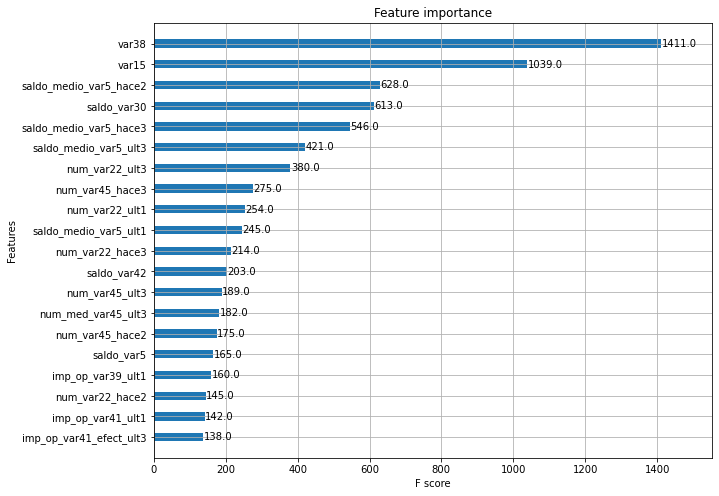

In [10]:
from xgboost import plot_importance
import matplotlib.pyplot as plt
%matplotlib inline

fig, ax = plt.subplots(1, 1, figsize=(10,8))
plot_importance(xgb_clf, ax=ax, max_num_features=20, height=0.4)

### LightGBM 모델 학습과 하이퍼 파라미터 튜닝

In [12]:
from lightgbm import LGBMClassifier

lgbm_clf = LGBMClassifier(n_estimators=500)

evals = [(X_test, y_test)]
lgbm_clf.fit(X_train, y_train, early_stopping_rounds=100, eval_metric="auc", eval_set=evals,
                verbose=True)

lgbm_roc_score = roc_auc_score(y_test, lgbm_clf.predict_proba(X_test)[:,1],average='macro')
print('ROC AUC: {0:.4f}'.format(lgbm_roc_score))

[1]	valid_0's auc: 0.817384	valid_0's binary_logloss: 0.165046
Training until validation scores don't improve for 100 rounds.
[2]	valid_0's auc: 0.81863	valid_0's binary_logloss: 0.16
[3]	valid_0's auc: 0.827411	valid_0's binary_logloss: 0.156287
[4]	valid_0's auc: 0.832175	valid_0's binary_logloss: 0.153416
[5]	valid_0's auc: 0.83481	valid_0's binary_logloss: 0.151206
[6]	valid_0's auc: 0.834721	valid_0's binary_logloss: 0.149303
[7]	valid_0's auc: 0.83659	valid_0's binary_logloss: 0.147804
[8]	valid_0's auc: 0.837602	valid_0's binary_logloss: 0.146466
[9]	valid_0's auc: 0.838114	valid_0's binary_logloss: 0.145476
[10]	valid_0's auc: 0.838472	valid_0's binary_logloss: 0.144681
[11]	valid_0's auc: 0.83808	valid_0's binary_logloss: 0.143978
[12]	valid_0's auc: 0.837771	valid_0's binary_logloss: 0.14341
[13]	valid_0's auc: 0.838063	valid_0's binary_logloss: 0.142835
[14]	valid_0's auc: 0.838485	valid_0's binary_logloss: 0.142296
[15]	valid_0's auc: 0.838542	valid_0's binary_logloss: 0.14

In [13]:
from sklearn.model_selection import GridSearchCV

# 하이퍼 파라미터 테스트의 수행 속도를 향상시키기 위해 n_estimators를 100으로 감소
LGBM_clf = LGBMClassifier(n_estimators=200)

params = {'num_leaves': [32, 64],
          'max_depth': [128, 160],
          'min_child_samples': [60, 100],
          'subsample': [0.8, 1]}

# 하이퍼 파라미터 테스트의 수행속도를 향상 시키기 위해 cv 를 지정하지 않습니다. 
gridcv = GridSearchCV(lgbm_clf, param_grid=params)
gridcv.fit(X_train, y_train, early_stopping_rounds=30, eval_metric="auc",
           eval_set=[(X_train, y_train), (X_test, y_test)])

print('GridSearchCV 최적 파라미터:', gridcv.best_params_)
lgbm_roc_score = roc_auc_score(y_test, gridcv.predict_proba(X_test)[:,1], average='macro')
print('ROC AUC: {0:.4f}'.format(lgbm_roc_score))

[1]	valid_0's auc: 0.820235	valid_0's binary_logloss: 0.156085	valid_1's auc: 0.81613	valid_1's binary_logloss: 0.164998
Training until validation scores don't improve for 30 rounds.
[2]	valid_0's auc: 0.825775	valid_0's binary_logloss: 0.150951	valid_1's auc: 0.821831	valid_1's binary_logloss: 0.15988
[3]	valid_0's auc: 0.832192	valid_0's binary_logloss: 0.147167	valid_1's auc: 0.827302	valid_1's binary_logloss: 0.156397
[4]	valid_0's auc: 0.837518	valid_0's binary_logloss: 0.144131	valid_1's auc: 0.8334	valid_1's binary_logloss: 0.153325
[5]	valid_0's auc: 0.842289	valid_0's binary_logloss: 0.141651	valid_1's auc: 0.836018	valid_1's binary_logloss: 0.150959
[6]	valid_0's auc: 0.844974	valid_0's binary_logloss: 0.139661	valid_1's auc: 0.838022	valid_1's binary_logloss: 0.149046
[7]	valid_0's auc: 0.846623	valid_0's binary_logloss: 0.138001	valid_1's auc: 0.837777	valid_1's binary_logloss: 0.147509
[8]	valid_0's auc: 0.848529	valid_0's binary_logloss: 0.136578	valid_1's auc: 0.839519	v

C:\Users\chkwon\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\chkwon\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's auc: 0.814371	valid_0's binary_logloss: 0.156455	valid_1's auc: 0.813175	valid_1's binary_logloss: 0.16542
Training until validation scores don't improve for 30 rounds.
[2]	valid_0's auc: 0.827201	valid_0's binary_logloss: 0.151083	valid_1's auc: 0.820013	valid_1's binary_logloss: 0.160085
[3]	valid_0's auc: 0.837003	valid_0's binary_logloss: 0.147235	valid_1's auc: 0.828713	valid_1's binary_logloss: 0.156463
[4]	valid_0's auc: 0.840971	valid_0's binary_logloss: 0.144235	valid_1's auc: 0.831369	valid_1's binary_logloss: 0.153575
[5]	valid_0's auc: 0.842902	valid_0's binary_logloss: 0.141803	valid_1's auc: 0.833329	valid_1's binary_logloss: 0.151283
[6]	valid_0's auc: 0.847067	valid_0's binary_logloss: 0.139776	valid_1's auc: 0.836625	valid_1's binary_logloss: 0.14937
[7]	valid_0's auc: 0.848894	valid_0's binary_logloss: 0.138056	valid_1's auc: 0.837174	valid_1's binary_logloss: 0.147778
[8]	valid_0's auc: 0.850546	valid_0's binary_logloss: 0.136579	valid_1's auc: 0.837405

C:\Users\chkwon\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\chkwon\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's auc: 0.821645	valid_0's binary_logloss: 0.156526	valid_1's auc: 0.81857	valid_1's binary_logloss: 0.165099
Training until validation scores don't improve for 30 rounds.
[2]	valid_0's auc: 0.827652	valid_0's binary_logloss: 0.151185	valid_1's auc: 0.82254	valid_1's binary_logloss: 0.160085
[3]	valid_0's auc: 0.836059	valid_0's binary_logloss: 0.14726	valid_1's auc: 0.828119	valid_1's binary_logloss: 0.156604
[4]	valid_0's auc: 0.840512	valid_0's binary_logloss: 0.144255	valid_1's auc: 0.831906	valid_1's binary_logloss: 0.153569
[5]	valid_0's auc: 0.841872	valid_0's binary_logloss: 0.141762	valid_1's auc: 0.834269	valid_1's binary_logloss: 0.151256
[6]	valid_0's auc: 0.844933	valid_0's binary_logloss: 0.139748	valid_1's auc: 0.835284	valid_1's binary_logloss: 0.149358
[7]	valid_0's auc: 0.845797	valid_0's binary_logloss: 0.138081	valid_1's auc: 0.834956	valid_1's binary_logloss: 0.147852
[8]	valid_0's auc: 0.847134	valid_0's binary_logloss: 0.136692	valid_1's auc: 0.836859	

C:\Users\chkwon\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\chkwon\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's auc: 0.820235	valid_0's binary_logloss: 0.156085	valid_1's auc: 0.81613	valid_1's binary_logloss: 0.164998
Training until validation scores don't improve for 30 rounds.
[2]	valid_0's auc: 0.825775	valid_0's binary_logloss: 0.150951	valid_1's auc: 0.821831	valid_1's binary_logloss: 0.15988
[3]	valid_0's auc: 0.832192	valid_0's binary_logloss: 0.147167	valid_1's auc: 0.827302	valid_1's binary_logloss: 0.156397
[4]	valid_0's auc: 0.837518	valid_0's binary_logloss: 0.144131	valid_1's auc: 0.8334	valid_1's binary_logloss: 0.153325
[5]	valid_0's auc: 0.842289	valid_0's binary_logloss: 0.141651	valid_1's auc: 0.836018	valid_1's binary_logloss: 0.150959
[6]	valid_0's auc: 0.844974	valid_0's binary_logloss: 0.139661	valid_1's auc: 0.838022	valid_1's binary_logloss: 0.149046
[7]	valid_0's auc: 0.846623	valid_0's binary_logloss: 0.138001	valid_1's auc: 0.837777	valid_1's binary_logloss: 0.147509
[8]	valid_0's auc: 0.848529	valid_0's binary_logloss: 0.136578	valid_1's auc: 0.839519	v

C:\Users\chkwon\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\chkwon\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's auc: 0.814371	valid_0's binary_logloss: 0.156455	valid_1's auc: 0.813175	valid_1's binary_logloss: 0.16542
Training until validation scores don't improve for 30 rounds.
[2]	valid_0's auc: 0.827201	valid_0's binary_logloss: 0.151083	valid_1's auc: 0.820013	valid_1's binary_logloss: 0.160085
[3]	valid_0's auc: 0.837003	valid_0's binary_logloss: 0.147235	valid_1's auc: 0.828713	valid_1's binary_logloss: 0.156463
[4]	valid_0's auc: 0.840971	valid_0's binary_logloss: 0.144235	valid_1's auc: 0.831369	valid_1's binary_logloss: 0.153575
[5]	valid_0's auc: 0.842902	valid_0's binary_logloss: 0.141803	valid_1's auc: 0.833329	valid_1's binary_logloss: 0.151283
[6]	valid_0's auc: 0.847067	valid_0's binary_logloss: 0.139776	valid_1's auc: 0.836625	valid_1's binary_logloss: 0.14937
[7]	valid_0's auc: 0.848894	valid_0's binary_logloss: 0.138056	valid_1's auc: 0.837174	valid_1's binary_logloss: 0.147778
[8]	valid_0's auc: 0.850546	valid_0's binary_logloss: 0.136579	valid_1's auc: 0.837405

C:\Users\chkwon\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\chkwon\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's auc: 0.821645	valid_0's binary_logloss: 0.156526	valid_1's auc: 0.81857	valid_1's binary_logloss: 0.165099
Training until validation scores don't improve for 30 rounds.
[2]	valid_0's auc: 0.827652	valid_0's binary_logloss: 0.151185	valid_1's auc: 0.82254	valid_1's binary_logloss: 0.160085
[3]	valid_0's auc: 0.836059	valid_0's binary_logloss: 0.14726	valid_1's auc: 0.828119	valid_1's binary_logloss: 0.156604
[4]	valid_0's auc: 0.840512	valid_0's binary_logloss: 0.144255	valid_1's auc: 0.831906	valid_1's binary_logloss: 0.153569
[5]	valid_0's auc: 0.841872	valid_0's binary_logloss: 0.141762	valid_1's auc: 0.834269	valid_1's binary_logloss: 0.151256
[6]	valid_0's auc: 0.844933	valid_0's binary_logloss: 0.139748	valid_1's auc: 0.835284	valid_1's binary_logloss: 0.149358
[7]	valid_0's auc: 0.845797	valid_0's binary_logloss: 0.138081	valid_1's auc: 0.834956	valid_1's binary_logloss: 0.147852
[8]	valid_0's auc: 0.847134	valid_0's binary_logloss: 0.136692	valid_1's auc: 0.836859	

C:\Users\chkwon\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\chkwon\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's auc: 0.832891	valid_0's binary_logloss: 0.155301	valid_1's auc: 0.818851	valid_1's binary_logloss: 0.164831
Training until validation scores don't improve for 30 rounds.
[2]	valid_0's auc: 0.845606	valid_0's binary_logloss: 0.149818	valid_1's auc: 0.826972	valid_1's binary_logloss: 0.159925
[3]	valid_0's auc: 0.850188	valid_0's binary_logloss: 0.145683	valid_1's auc: 0.828704	valid_1's binary_logloss: 0.156313
[4]	valid_0's auc: 0.85231	valid_0's binary_logloss: 0.142507	valid_1's auc: 0.829069	valid_1's binary_logloss: 0.153533
[5]	valid_0's auc: 0.854335	valid_0's binary_logloss: 0.139906	valid_1's auc: 0.832066	valid_1's binary_logloss: 0.151309
[6]	valid_0's auc: 0.857012	valid_0's binary_logloss: 0.137695	valid_1's auc: 0.834623	valid_1's binary_logloss: 0.14943
[7]	valid_0's auc: 0.858925	valid_0's binary_logloss: 0.135794	valid_1's auc: 0.834545	valid_1's binary_logloss: 0.147904
[8]	valid_0's auc: 0.861608	valid_0's binary_logloss: 0.134145	valid_1's auc: 0.833797

C:\Users\chkwon\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\chkwon\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's auc: 0.833054	valid_0's binary_logloss: 0.155723	valid_1's auc: 0.817048	valid_1's binary_logloss: 0.165042
Training until validation scores don't improve for 30 rounds.
[2]	valid_0's auc: 0.840929	valid_0's binary_logloss: 0.149897	valid_1's auc: 0.820838	valid_1's binary_logloss: 0.159671
[3]	valid_0's auc: 0.85054	valid_0's binary_logloss: 0.14575	valid_1's auc: 0.827828	valid_1's binary_logloss: 0.156036
[4]	valid_0's auc: 0.855605	valid_0's binary_logloss: 0.14246	valid_1's auc: 0.831388	valid_1's binary_logloss: 0.153065
[5]	valid_0's auc: 0.858903	valid_0's binary_logloss: 0.139711	valid_1's auc: 0.834493	valid_1's binary_logloss: 0.150758
[6]	valid_0's auc: 0.860869	valid_0's binary_logloss: 0.137459	valid_1's auc: 0.833775	valid_1's binary_logloss: 0.149055
[7]	valid_0's auc: 0.862879	valid_0's binary_logloss: 0.135513	valid_1's auc: 0.836672	valid_1's binary_logloss: 0.147391
[8]	valid_0's auc: 0.863872	valid_0's binary_logloss: 0.133916	valid_1's auc: 0.835878	

C:\Users\chkwon\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\chkwon\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's auc: 0.830649	valid_0's binary_logloss: 0.155755	valid_1's auc: 0.81673	valid_1's binary_logloss: 0.164976
Training until validation scores don't improve for 30 rounds.
[2]	valid_0's auc: 0.839656	valid_0's binary_logloss: 0.150015	valid_1's auc: 0.822663	valid_1's binary_logloss: 0.159866
[3]	valid_0's auc: 0.847827	valid_0's binary_logloss: 0.145888	valid_1's auc: 0.829595	valid_1's binary_logloss: 0.156171
[4]	valid_0's auc: 0.851153	valid_0's binary_logloss: 0.142542	valid_1's auc: 0.831052	valid_1's binary_logloss: 0.153261
[5]	valid_0's auc: 0.854418	valid_0's binary_logloss: 0.139824	valid_1's auc: 0.832726	valid_1's binary_logloss: 0.150974
[6]	valid_0's auc: 0.85615	valid_0's binary_logloss: 0.137634	valid_1's auc: 0.835578	valid_1's binary_logloss: 0.148988
[7]	valid_0's auc: 0.857116	valid_0's binary_logloss: 0.135891	valid_1's auc: 0.834971	valid_1's binary_logloss: 0.147626
[8]	valid_0's auc: 0.859522	valid_0's binary_logloss: 0.134235	valid_1's auc: 0.836528

C:\Users\chkwon\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\chkwon\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's auc: 0.832891	valid_0's binary_logloss: 0.155301	valid_1's auc: 0.818851	valid_1's binary_logloss: 0.164831
Training until validation scores don't improve for 30 rounds.
[2]	valid_0's auc: 0.845606	valid_0's binary_logloss: 0.149818	valid_1's auc: 0.826972	valid_1's binary_logloss: 0.159925
[3]	valid_0's auc: 0.850188	valid_0's binary_logloss: 0.145683	valid_1's auc: 0.828704	valid_1's binary_logloss: 0.156313
[4]	valid_0's auc: 0.85231	valid_0's binary_logloss: 0.142507	valid_1's auc: 0.829069	valid_1's binary_logloss: 0.153533
[5]	valid_0's auc: 0.854335	valid_0's binary_logloss: 0.139906	valid_1's auc: 0.832066	valid_1's binary_logloss: 0.151309
[6]	valid_0's auc: 0.857012	valid_0's binary_logloss: 0.137695	valid_1's auc: 0.834623	valid_1's binary_logloss: 0.14943
[7]	valid_0's auc: 0.858925	valid_0's binary_logloss: 0.135794	valid_1's auc: 0.834545	valid_1's binary_logloss: 0.147904
[8]	valid_0's auc: 0.861608	valid_0's binary_logloss: 0.134145	valid_1's auc: 0.833797

C:\Users\chkwon\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\chkwon\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's auc: 0.833054	valid_0's binary_logloss: 0.155723	valid_1's auc: 0.817048	valid_1's binary_logloss: 0.165042
Training until validation scores don't improve for 30 rounds.
[2]	valid_0's auc: 0.840929	valid_0's binary_logloss: 0.149897	valid_1's auc: 0.820838	valid_1's binary_logloss: 0.159671
[3]	valid_0's auc: 0.85054	valid_0's binary_logloss: 0.14575	valid_1's auc: 0.827828	valid_1's binary_logloss: 0.156036
[4]	valid_0's auc: 0.855605	valid_0's binary_logloss: 0.14246	valid_1's auc: 0.831388	valid_1's binary_logloss: 0.153065
[5]	valid_0's auc: 0.858903	valid_0's binary_logloss: 0.139711	valid_1's auc: 0.834493	valid_1's binary_logloss: 0.150758
[6]	valid_0's auc: 0.860869	valid_0's binary_logloss: 0.137459	valid_1's auc: 0.833775	valid_1's binary_logloss: 0.149055
[7]	valid_0's auc: 0.862879	valid_0's binary_logloss: 0.135513	valid_1's auc: 0.836672	valid_1's binary_logloss: 0.147391
[8]	valid_0's auc: 0.863872	valid_0's binary_logloss: 0.133916	valid_1's auc: 0.835878	

C:\Users\chkwon\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\chkwon\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's auc: 0.830649	valid_0's binary_logloss: 0.155755	valid_1's auc: 0.81673	valid_1's binary_logloss: 0.164976
Training until validation scores don't improve for 30 rounds.
[2]	valid_0's auc: 0.839656	valid_0's binary_logloss: 0.150015	valid_1's auc: 0.822663	valid_1's binary_logloss: 0.159866
[3]	valid_0's auc: 0.847827	valid_0's binary_logloss: 0.145888	valid_1's auc: 0.829595	valid_1's binary_logloss: 0.156171
[4]	valid_0's auc: 0.851153	valid_0's binary_logloss: 0.142542	valid_1's auc: 0.831052	valid_1's binary_logloss: 0.153261
[5]	valid_0's auc: 0.854418	valid_0's binary_logloss: 0.139824	valid_1's auc: 0.832726	valid_1's binary_logloss: 0.150974
[6]	valid_0's auc: 0.85615	valid_0's binary_logloss: 0.137634	valid_1's auc: 0.835578	valid_1's binary_logloss: 0.148988
[7]	valid_0's auc: 0.857116	valid_0's binary_logloss: 0.135891	valid_1's auc: 0.834971	valid_1's binary_logloss: 0.147626
[8]	valid_0's auc: 0.859522	valid_0's binary_logloss: 0.134235	valid_1's auc: 0.836528

C:\Users\chkwon\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\chkwon\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's auc: 0.824873	valid_0's binary_logloss: 0.156222	valid_1's auc: 0.817791	valid_1's binary_logloss: 0.165077
Training until validation scores don't improve for 30 rounds.
[2]	valid_0's auc: 0.829172	valid_0's binary_logloss: 0.151168	valid_1's auc: 0.823373	valid_1's binary_logloss: 0.160071
[3]	valid_0's auc: 0.836076	valid_0's binary_logloss: 0.147371	valid_1's auc: 0.829343	valid_1's binary_logloss: 0.156297
[4]	valid_0's auc: 0.839875	valid_0's binary_logloss: 0.14444	valid_1's auc: 0.833421	valid_1's binary_logloss: 0.153356
[5]	valid_0's auc: 0.84413	valid_0's binary_logloss: 0.142061	valid_1's auc: 0.835156	valid_1's binary_logloss: 0.151047
[6]	valid_0's auc: 0.846462	valid_0's binary_logloss: 0.140071	valid_1's auc: 0.835505	valid_1's binary_logloss: 0.14915
[7]	valid_0's auc: 0.847647	valid_0's binary_logloss: 0.138475	valid_1's auc: 0.835469	valid_1's binary_logloss: 0.147559
[8]	valid_0's auc: 0.848591	valid_0's binary_logloss: 0.13704	valid_1's auc: 0.835911	v

C:\Users\chkwon\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\chkwon\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's auc: 0.821831	valid_0's binary_logloss: 0.156469	valid_1's auc: 0.817525	valid_1's binary_logloss: 0.165188
Training until validation scores don't improve for 30 rounds.
[2]	valid_0's auc: 0.830014	valid_0's binary_logloss: 0.151109	valid_1's auc: 0.823491	valid_1's binary_logloss: 0.159651
[3]	valid_0's auc: 0.839606	valid_0's binary_logloss: 0.147325	valid_1's auc: 0.832736	valid_1's binary_logloss: 0.156031
[4]	valid_0's auc: 0.842933	valid_0's binary_logloss: 0.144392	valid_1's auc: 0.836202	valid_1's binary_logloss: 0.15311
[5]	valid_0's auc: 0.845714	valid_0's binary_logloss: 0.141965	valid_1's auc: 0.838652	valid_1's binary_logloss: 0.150749
[6]	valid_0's auc: 0.848431	valid_0's binary_logloss: 0.13995	valid_1's auc: 0.840279	valid_1's binary_logloss: 0.148948
[7]	valid_0's auc: 0.849908	valid_0's binary_logloss: 0.138315	valid_1's auc: 0.840328	valid_1's binary_logloss: 0.14741
[8]	valid_0's auc: 0.852054	valid_0's binary_logloss: 0.136907	valid_1's auc: 0.83901	v

C:\Users\chkwon\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\chkwon\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's auc: 0.821427	valid_0's binary_logloss: 0.156591	valid_1's auc: 0.81711	valid_1's binary_logloss: 0.165271
Training until validation scores don't improve for 30 rounds.
[2]	valid_0's auc: 0.827907	valid_0's binary_logloss: 0.151333	valid_1's auc: 0.821466	valid_1's binary_logloss: 0.160205
[3]	valid_0's auc: 0.837845	valid_0's binary_logloss: 0.147475	valid_1's auc: 0.828667	valid_1's binary_logloss: 0.156481
[4]	valid_0's auc: 0.840614	valid_0's binary_logloss: 0.144432	valid_1's auc: 0.831943	valid_1's binary_logloss: 0.153529
[5]	valid_0's auc: 0.843179	valid_0's binary_logloss: 0.142066	valid_1's auc: 0.834251	valid_1's binary_logloss: 0.151202
[6]	valid_0's auc: 0.843372	valid_0's binary_logloss: 0.140161	valid_1's auc: 0.834689	valid_1's binary_logloss: 0.14929
[7]	valid_0's auc: 0.844766	valid_0's binary_logloss: 0.138478	valid_1's auc: 0.835816	valid_1's binary_logloss: 0.147704
[8]	valid_0's auc: 0.847116	valid_0's binary_logloss: 0.137115	valid_1's auc: 0.836076

C:\Users\chkwon\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\chkwon\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's auc: 0.824873	valid_0's binary_logloss: 0.156222	valid_1's auc: 0.817791	valid_1's binary_logloss: 0.165077
Training until validation scores don't improve for 30 rounds.
[2]	valid_0's auc: 0.829172	valid_0's binary_logloss: 0.151168	valid_1's auc: 0.823373	valid_1's binary_logloss: 0.160071
[3]	valid_0's auc: 0.836076	valid_0's binary_logloss: 0.147371	valid_1's auc: 0.829343	valid_1's binary_logloss: 0.156297
[4]	valid_0's auc: 0.839875	valid_0's binary_logloss: 0.14444	valid_1's auc: 0.833421	valid_1's binary_logloss: 0.153356
[5]	valid_0's auc: 0.84413	valid_0's binary_logloss: 0.142061	valid_1's auc: 0.835156	valid_1's binary_logloss: 0.151047
[6]	valid_0's auc: 0.846462	valid_0's binary_logloss: 0.140071	valid_1's auc: 0.835505	valid_1's binary_logloss: 0.14915
[7]	valid_0's auc: 0.847647	valid_0's binary_logloss: 0.138475	valid_1's auc: 0.835469	valid_1's binary_logloss: 0.147559
[8]	valid_0's auc: 0.848591	valid_0's binary_logloss: 0.13704	valid_1's auc: 0.835911	v

C:\Users\chkwon\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\chkwon\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


Early stopping, best iteration is:
[9]	valid_0's auc: 0.849213	valid_0's binary_logloss: 0.135881	valid_1's auc: 0.838015	valid_1's binary_logloss: 0.1453
[1]	valid_0's auc: 0.821831	valid_0's binary_logloss: 0.156469	valid_1's auc: 0.817525	valid_1's binary_logloss: 0.165188
Training until validation scores don't improve for 30 rounds.
[2]	valid_0's auc: 0.830014	valid_0's binary_logloss: 0.151109	valid_1's auc: 0.823491	valid_1's binary_logloss: 0.159651
[3]	valid_0's auc: 0.839606	valid_0's binary_logloss: 0.147325	valid_1's auc: 0.832736	valid_1's binary_logloss: 0.156031
[4]	valid_0's auc: 0.842933	valid_0's binary_logloss: 0.144392	valid_1's auc: 0.836202	valid_1's binary_logloss: 0.15311
[5]	valid_0's auc: 0.845714	valid_0's binary_logloss: 0.141965	valid_1's auc: 0.838652	valid_1's binary_logloss: 0.150749
[6]	valid_0's auc: 0.848431	valid_0's binary_logloss: 0.13995	valid_1's auc: 0.840279	valid_1's binary_logloss: 0.148948
[7]	valid_0's auc: 0.849908	valid_0's binary_logloss:

C:\Users\chkwon\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\chkwon\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's auc: 0.821427	valid_0's binary_logloss: 0.156591	valid_1's auc: 0.81711	valid_1's binary_logloss: 0.165271
Training until validation scores don't improve for 30 rounds.
[2]	valid_0's auc: 0.827907	valid_0's binary_logloss: 0.151333	valid_1's auc: 0.821466	valid_1's binary_logloss: 0.160205
[3]	valid_0's auc: 0.837845	valid_0's binary_logloss: 0.147475	valid_1's auc: 0.828667	valid_1's binary_logloss: 0.156481
[4]	valid_0's auc: 0.840614	valid_0's binary_logloss: 0.144432	valid_1's auc: 0.831943	valid_1's binary_logloss: 0.153529
[5]	valid_0's auc: 0.843179	valid_0's binary_logloss: 0.142066	valid_1's auc: 0.834251	valid_1's binary_logloss: 0.151202
[6]	valid_0's auc: 0.843372	valid_0's binary_logloss: 0.140161	valid_1's auc: 0.834689	valid_1's binary_logloss: 0.14929
[7]	valid_0's auc: 0.844766	valid_0's binary_logloss: 0.138478	valid_1's auc: 0.835816	valid_1's binary_logloss: 0.147704
[8]	valid_0's auc: 0.847116	valid_0's binary_logloss: 0.137115	valid_1's auc: 0.836076

C:\Users\chkwon\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\chkwon\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's auc: 0.835412	valid_0's binary_logloss: 0.155721	valid_1's auc: 0.81973	valid_1's binary_logloss: 0.164849
Training until validation scores don't improve for 30 rounds.
[2]	valid_0's auc: 0.841234	valid_0's binary_logloss: 0.150325	valid_1's auc: 0.823604	valid_1's binary_logloss: 0.159865
[3]	valid_0's auc: 0.846416	valid_0's binary_logloss: 0.146303	valid_1's auc: 0.824414	valid_1's binary_logloss: 0.156273
[4]	valid_0's auc: 0.85113	valid_0's binary_logloss: 0.143142	valid_1's auc: 0.83033	valid_1's binary_logloss: 0.153388
[5]	valid_0's auc: 0.854001	valid_0's binary_logloss: 0.140572	valid_1's auc: 0.831279	valid_1's binary_logloss: 0.151139
[6]	valid_0's auc: 0.856684	valid_0's binary_logloss: 0.138389	valid_1's auc: 0.83309	valid_1's binary_logloss: 0.149282
[7]	valid_0's auc: 0.858456	valid_0's binary_logloss: 0.136552	valid_1's auc: 0.833723	valid_1's binary_logloss: 0.147799
[8]	valid_0's auc: 0.8595	valid_0's binary_logloss: 0.135038	valid_1's auc: 0.834417	val

C:\Users\chkwon\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\chkwon\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's auc: 0.830452	valid_0's binary_logloss: 0.155919	valid_1's auc: 0.817465	valid_1's binary_logloss: 0.164895
Training until validation scores don't improve for 30 rounds.
[2]	valid_0's auc: 0.843009	valid_0's binary_logloss: 0.150278	valid_1's auc: 0.828176	valid_1's binary_logloss: 0.159411
[3]	valid_0's auc: 0.851789	valid_0's binary_logloss: 0.146252	valid_1's auc: 0.832597	valid_1's binary_logloss: 0.155736
[4]	valid_0's auc: 0.854657	valid_0's binary_logloss: 0.143075	valid_1's auc: 0.83416	valid_1's binary_logloss: 0.152859
[5]	valid_0's auc: 0.85652	valid_0's binary_logloss: 0.140511	valid_1's auc: 0.836671	valid_1's binary_logloss: 0.150427
[6]	valid_0's auc: 0.85962	valid_0's binary_logloss: 0.138318	valid_1's auc: 0.836445	valid_1's binary_logloss: 0.148531
[7]	valid_0's auc: 0.861186	valid_0's binary_logloss: 0.136426	valid_1's auc: 0.837332	valid_1's binary_logloss: 0.146966
[8]	valid_0's auc: 0.863008	valid_0's binary_logloss: 0.134791	valid_1's auc: 0.837707	

C:\Users\chkwon\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\chkwon\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's auc: 0.834758	valid_0's binary_logloss: 0.156067	valid_1's auc: 0.822971	valid_1's binary_logloss: 0.165101
Training until validation scores don't improve for 30 rounds.
[2]	valid_0's auc: 0.842403	valid_0's binary_logloss: 0.150502	valid_1's auc: 0.828728	valid_1's binary_logloss: 0.159785
[3]	valid_0's auc: 0.847356	valid_0's binary_logloss: 0.146328	valid_1's auc: 0.830832	valid_1's binary_logloss: 0.156017
[4]	valid_0's auc: 0.84996	valid_0's binary_logloss: 0.143134	valid_1's auc: 0.83154	valid_1's binary_logloss: 0.15319
[5]	valid_0's auc: 0.853547	valid_0's binary_logloss: 0.140471	valid_1's auc: 0.833818	valid_1's binary_logloss: 0.150761
[6]	valid_0's auc: 0.855549	valid_0's binary_logloss: 0.138282	valid_1's auc: 0.834224	valid_1's binary_logloss: 0.148815
[7]	valid_0's auc: 0.857045	valid_0's binary_logloss: 0.136467	valid_1's auc: 0.835329	valid_1's binary_logloss: 0.147338
[8]	valid_0's auc: 0.858416	valid_0's binary_logloss: 0.134953	valid_1's auc: 0.836144	

C:\Users\chkwon\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\chkwon\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's auc: 0.835412	valid_0's binary_logloss: 0.155721	valid_1's auc: 0.81973	valid_1's binary_logloss: 0.164849
Training until validation scores don't improve for 30 rounds.
[2]	valid_0's auc: 0.841234	valid_0's binary_logloss: 0.150325	valid_1's auc: 0.823604	valid_1's binary_logloss: 0.159865
[3]	valid_0's auc: 0.846416	valid_0's binary_logloss: 0.146303	valid_1's auc: 0.824414	valid_1's binary_logloss: 0.156273
[4]	valid_0's auc: 0.85113	valid_0's binary_logloss: 0.143142	valid_1's auc: 0.83033	valid_1's binary_logloss: 0.153388
[5]	valid_0's auc: 0.854001	valid_0's binary_logloss: 0.140572	valid_1's auc: 0.831279	valid_1's binary_logloss: 0.151139
[6]	valid_0's auc: 0.856684	valid_0's binary_logloss: 0.138389	valid_1's auc: 0.83309	valid_1's binary_logloss: 0.149282
[7]	valid_0's auc: 0.858456	valid_0's binary_logloss: 0.136552	valid_1's auc: 0.833723	valid_1's binary_logloss: 0.147799
[8]	valid_0's auc: 0.8595	valid_0's binary_logloss: 0.135038	valid_1's auc: 0.834417	val

C:\Users\chkwon\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\chkwon\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's auc: 0.830452	valid_0's binary_logloss: 0.155919	valid_1's auc: 0.817465	valid_1's binary_logloss: 0.164895
Training until validation scores don't improve for 30 rounds.
[2]	valid_0's auc: 0.843009	valid_0's binary_logloss: 0.150278	valid_1's auc: 0.828176	valid_1's binary_logloss: 0.159411
[3]	valid_0's auc: 0.851789	valid_0's binary_logloss: 0.146252	valid_1's auc: 0.832597	valid_1's binary_logloss: 0.155736
[4]	valid_0's auc: 0.854657	valid_0's binary_logloss: 0.143075	valid_1's auc: 0.83416	valid_1's binary_logloss: 0.152859
[5]	valid_0's auc: 0.85652	valid_0's binary_logloss: 0.140511	valid_1's auc: 0.836671	valid_1's binary_logloss: 0.150427
[6]	valid_0's auc: 0.85962	valid_0's binary_logloss: 0.138318	valid_1's auc: 0.836445	valid_1's binary_logloss: 0.148531
[7]	valid_0's auc: 0.861186	valid_0's binary_logloss: 0.136426	valid_1's auc: 0.837332	valid_1's binary_logloss: 0.146966
[8]	valid_0's auc: 0.863008	valid_0's binary_logloss: 0.134791	valid_1's auc: 0.837707	

C:\Users\chkwon\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\chkwon\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's auc: 0.834758	valid_0's binary_logloss: 0.156067	valid_1's auc: 0.822971	valid_1's binary_logloss: 0.165101
Training until validation scores don't improve for 30 rounds.
[2]	valid_0's auc: 0.842403	valid_0's binary_logloss: 0.150502	valid_1's auc: 0.828728	valid_1's binary_logloss: 0.159785
[3]	valid_0's auc: 0.847356	valid_0's binary_logloss: 0.146328	valid_1's auc: 0.830832	valid_1's binary_logloss: 0.156017
[4]	valid_0's auc: 0.84996	valid_0's binary_logloss: 0.143134	valid_1's auc: 0.83154	valid_1's binary_logloss: 0.15319
[5]	valid_0's auc: 0.853547	valid_0's binary_logloss: 0.140471	valid_1's auc: 0.833818	valid_1's binary_logloss: 0.150761
[6]	valid_0's auc: 0.855549	valid_0's binary_logloss: 0.138282	valid_1's auc: 0.834224	valid_1's binary_logloss: 0.148815
[7]	valid_0's auc: 0.857045	valid_0's binary_logloss: 0.136467	valid_1's auc: 0.835329	valid_1's binary_logloss: 0.147338
[8]	valid_0's auc: 0.858416	valid_0's binary_logloss: 0.134953	valid_1's auc: 0.836144	

C:\Users\chkwon\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\chkwon\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's auc: 0.820235	valid_0's binary_logloss: 0.156085	valid_1's auc: 0.81613	valid_1's binary_logloss: 0.164998
Training until validation scores don't improve for 30 rounds.
[2]	valid_0's auc: 0.825775	valid_0's binary_logloss: 0.150951	valid_1's auc: 0.821831	valid_1's binary_logloss: 0.15988
[3]	valid_0's auc: 0.832192	valid_0's binary_logloss: 0.147167	valid_1's auc: 0.827302	valid_1's binary_logloss: 0.156397
[4]	valid_0's auc: 0.837518	valid_0's binary_logloss: 0.144131	valid_1's auc: 0.8334	valid_1's binary_logloss: 0.153325
[5]	valid_0's auc: 0.842289	valid_0's binary_logloss: 0.141651	valid_1's auc: 0.836018	valid_1's binary_logloss: 0.150959
[6]	valid_0's auc: 0.844974	valid_0's binary_logloss: 0.139661	valid_1's auc: 0.838022	valid_1's binary_logloss: 0.149046
[7]	valid_0's auc: 0.846623	valid_0's binary_logloss: 0.138001	valid_1's auc: 0.837777	valid_1's binary_logloss: 0.147509
[8]	valid_0's auc: 0.848529	valid_0's binary_logloss: 0.136578	valid_1's auc: 0.839519	v

C:\Users\chkwon\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\chkwon\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's auc: 0.814371	valid_0's binary_logloss: 0.156455	valid_1's auc: 0.813175	valid_1's binary_logloss: 0.16542
Training until validation scores don't improve for 30 rounds.
[2]	valid_0's auc: 0.827201	valid_0's binary_logloss: 0.151083	valid_1's auc: 0.820013	valid_1's binary_logloss: 0.160085
[3]	valid_0's auc: 0.837003	valid_0's binary_logloss: 0.147235	valid_1's auc: 0.828713	valid_1's binary_logloss: 0.156463
[4]	valid_0's auc: 0.840971	valid_0's binary_logloss: 0.144235	valid_1's auc: 0.831369	valid_1's binary_logloss: 0.153575
[5]	valid_0's auc: 0.842902	valid_0's binary_logloss: 0.141803	valid_1's auc: 0.833329	valid_1's binary_logloss: 0.151283
[6]	valid_0's auc: 0.847067	valid_0's binary_logloss: 0.139776	valid_1's auc: 0.836625	valid_1's binary_logloss: 0.14937
[7]	valid_0's auc: 0.848894	valid_0's binary_logloss: 0.138056	valid_1's auc: 0.837174	valid_1's binary_logloss: 0.147778
[8]	valid_0's auc: 0.850546	valid_0's binary_logloss: 0.136579	valid_1's auc: 0.837405

C:\Users\chkwon\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\chkwon\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's auc: 0.821645	valid_0's binary_logloss: 0.156526	valid_1's auc: 0.81857	valid_1's binary_logloss: 0.165099
Training until validation scores don't improve for 30 rounds.
[2]	valid_0's auc: 0.827652	valid_0's binary_logloss: 0.151185	valid_1's auc: 0.82254	valid_1's binary_logloss: 0.160085
[3]	valid_0's auc: 0.836059	valid_0's binary_logloss: 0.14726	valid_1's auc: 0.828119	valid_1's binary_logloss: 0.156604
[4]	valid_0's auc: 0.840512	valid_0's binary_logloss: 0.144255	valid_1's auc: 0.831906	valid_1's binary_logloss: 0.153569
[5]	valid_0's auc: 0.841872	valid_0's binary_logloss: 0.141762	valid_1's auc: 0.834269	valid_1's binary_logloss: 0.151256
[6]	valid_0's auc: 0.844933	valid_0's binary_logloss: 0.139748	valid_1's auc: 0.835284	valid_1's binary_logloss: 0.149358
[7]	valid_0's auc: 0.845797	valid_0's binary_logloss: 0.138081	valid_1's auc: 0.834956	valid_1's binary_logloss: 0.147852
[8]	valid_0's auc: 0.847134	valid_0's binary_logloss: 0.136692	valid_1's auc: 0.836859	

C:\Users\chkwon\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\chkwon\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's auc: 0.820235	valid_0's binary_logloss: 0.156085	valid_1's auc: 0.81613	valid_1's binary_logloss: 0.164998
Training until validation scores don't improve for 30 rounds.
[2]	valid_0's auc: 0.825775	valid_0's binary_logloss: 0.150951	valid_1's auc: 0.821831	valid_1's binary_logloss: 0.15988
[3]	valid_0's auc: 0.832192	valid_0's binary_logloss: 0.147167	valid_1's auc: 0.827302	valid_1's binary_logloss: 0.156397
[4]	valid_0's auc: 0.837518	valid_0's binary_logloss: 0.144131	valid_1's auc: 0.8334	valid_1's binary_logloss: 0.153325
[5]	valid_0's auc: 0.842289	valid_0's binary_logloss: 0.141651	valid_1's auc: 0.836018	valid_1's binary_logloss: 0.150959
[6]	valid_0's auc: 0.844974	valid_0's binary_logloss: 0.139661	valid_1's auc: 0.838022	valid_1's binary_logloss: 0.149046
[7]	valid_0's auc: 0.846623	valid_0's binary_logloss: 0.138001	valid_1's auc: 0.837777	valid_1's binary_logloss: 0.147509
[8]	valid_0's auc: 0.848529	valid_0's binary_logloss: 0.136578	valid_1's auc: 0.839519	v

C:\Users\chkwon\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\chkwon\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's auc: 0.814371	valid_0's binary_logloss: 0.156455	valid_1's auc: 0.813175	valid_1's binary_logloss: 0.16542
Training until validation scores don't improve for 30 rounds.
[2]	valid_0's auc: 0.827201	valid_0's binary_logloss: 0.151083	valid_1's auc: 0.820013	valid_1's binary_logloss: 0.160085
[3]	valid_0's auc: 0.837003	valid_0's binary_logloss: 0.147235	valid_1's auc: 0.828713	valid_1's binary_logloss: 0.156463
[4]	valid_0's auc: 0.840971	valid_0's binary_logloss: 0.144235	valid_1's auc: 0.831369	valid_1's binary_logloss: 0.153575
[5]	valid_0's auc: 0.842902	valid_0's binary_logloss: 0.141803	valid_1's auc: 0.833329	valid_1's binary_logloss: 0.151283
[6]	valid_0's auc: 0.847067	valid_0's binary_logloss: 0.139776	valid_1's auc: 0.836625	valid_1's binary_logloss: 0.14937
[7]	valid_0's auc: 0.848894	valid_0's binary_logloss: 0.138056	valid_1's auc: 0.837174	valid_1's binary_logloss: 0.147778
[8]	valid_0's auc: 0.850546	valid_0's binary_logloss: 0.136579	valid_1's auc: 0.837405

C:\Users\chkwon\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\chkwon\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's auc: 0.821645	valid_0's binary_logloss: 0.156526	valid_1's auc: 0.81857	valid_1's binary_logloss: 0.165099
Training until validation scores don't improve for 30 rounds.
[2]	valid_0's auc: 0.827652	valid_0's binary_logloss: 0.151185	valid_1's auc: 0.82254	valid_1's binary_logloss: 0.160085
[3]	valid_0's auc: 0.836059	valid_0's binary_logloss: 0.14726	valid_1's auc: 0.828119	valid_1's binary_logloss: 0.156604
[4]	valid_0's auc: 0.840512	valid_0's binary_logloss: 0.144255	valid_1's auc: 0.831906	valid_1's binary_logloss: 0.153569
[5]	valid_0's auc: 0.841872	valid_0's binary_logloss: 0.141762	valid_1's auc: 0.834269	valid_1's binary_logloss: 0.151256
[6]	valid_0's auc: 0.844933	valid_0's binary_logloss: 0.139748	valid_1's auc: 0.835284	valid_1's binary_logloss: 0.149358
[7]	valid_0's auc: 0.845797	valid_0's binary_logloss: 0.138081	valid_1's auc: 0.834956	valid_1's binary_logloss: 0.147852
[8]	valid_0's auc: 0.847134	valid_0's binary_logloss: 0.136692	valid_1's auc: 0.836859	

C:\Users\chkwon\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\chkwon\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's auc: 0.832891	valid_0's binary_logloss: 0.155301	valid_1's auc: 0.818851	valid_1's binary_logloss: 0.164831
Training until validation scores don't improve for 30 rounds.
[2]	valid_0's auc: 0.845606	valid_0's binary_logloss: 0.149818	valid_1's auc: 0.826972	valid_1's binary_logloss: 0.159925
[3]	valid_0's auc: 0.850188	valid_0's binary_logloss: 0.145683	valid_1's auc: 0.828704	valid_1's binary_logloss: 0.156313
[4]	valid_0's auc: 0.85231	valid_0's binary_logloss: 0.142507	valid_1's auc: 0.829069	valid_1's binary_logloss: 0.153533
[5]	valid_0's auc: 0.854335	valid_0's binary_logloss: 0.139906	valid_1's auc: 0.832066	valid_1's binary_logloss: 0.151309
[6]	valid_0's auc: 0.857012	valid_0's binary_logloss: 0.137695	valid_1's auc: 0.834623	valid_1's binary_logloss: 0.14943
[7]	valid_0's auc: 0.858925	valid_0's binary_logloss: 0.135794	valid_1's auc: 0.834545	valid_1's binary_logloss: 0.147904
[8]	valid_0's auc: 0.861608	valid_0's binary_logloss: 0.134145	valid_1's auc: 0.833797

C:\Users\chkwon\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\chkwon\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's auc: 0.833054	valid_0's binary_logloss: 0.155723	valid_1's auc: 0.817048	valid_1's binary_logloss: 0.165042
Training until validation scores don't improve for 30 rounds.
[2]	valid_0's auc: 0.840929	valid_0's binary_logloss: 0.149897	valid_1's auc: 0.820838	valid_1's binary_logloss: 0.159671
[3]	valid_0's auc: 0.85054	valid_0's binary_logloss: 0.14575	valid_1's auc: 0.827828	valid_1's binary_logloss: 0.156036
[4]	valid_0's auc: 0.855605	valid_0's binary_logloss: 0.14246	valid_1's auc: 0.831388	valid_1's binary_logloss: 0.153065
[5]	valid_0's auc: 0.858903	valid_0's binary_logloss: 0.139711	valid_1's auc: 0.834493	valid_1's binary_logloss: 0.150758
[6]	valid_0's auc: 0.860869	valid_0's binary_logloss: 0.137459	valid_1's auc: 0.833775	valid_1's binary_logloss: 0.149055
[7]	valid_0's auc: 0.862879	valid_0's binary_logloss: 0.135513	valid_1's auc: 0.836672	valid_1's binary_logloss: 0.147391
[8]	valid_0's auc: 0.863872	valid_0's binary_logloss: 0.133916	valid_1's auc: 0.835878	

C:\Users\chkwon\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\chkwon\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's auc: 0.830649	valid_0's binary_logloss: 0.155755	valid_1's auc: 0.81673	valid_1's binary_logloss: 0.164976
Training until validation scores don't improve for 30 rounds.
[2]	valid_0's auc: 0.839656	valid_0's binary_logloss: 0.150015	valid_1's auc: 0.822663	valid_1's binary_logloss: 0.159866
[3]	valid_0's auc: 0.847827	valid_0's binary_logloss: 0.145888	valid_1's auc: 0.829595	valid_1's binary_logloss: 0.156171
[4]	valid_0's auc: 0.851153	valid_0's binary_logloss: 0.142542	valid_1's auc: 0.831052	valid_1's binary_logloss: 0.153261
[5]	valid_0's auc: 0.854418	valid_0's binary_logloss: 0.139824	valid_1's auc: 0.832726	valid_1's binary_logloss: 0.150974
[6]	valid_0's auc: 0.85615	valid_0's binary_logloss: 0.137634	valid_1's auc: 0.835578	valid_1's binary_logloss: 0.148988
[7]	valid_0's auc: 0.857116	valid_0's binary_logloss: 0.135891	valid_1's auc: 0.834971	valid_1's binary_logloss: 0.147626
[8]	valid_0's auc: 0.859522	valid_0's binary_logloss: 0.134235	valid_1's auc: 0.836528

C:\Users\chkwon\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\chkwon\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's auc: 0.832891	valid_0's binary_logloss: 0.155301	valid_1's auc: 0.818851	valid_1's binary_logloss: 0.164831
Training until validation scores don't improve for 30 rounds.
[2]	valid_0's auc: 0.845606	valid_0's binary_logloss: 0.149818	valid_1's auc: 0.826972	valid_1's binary_logloss: 0.159925
[3]	valid_0's auc: 0.850188	valid_0's binary_logloss: 0.145683	valid_1's auc: 0.828704	valid_1's binary_logloss: 0.156313
[4]	valid_0's auc: 0.85231	valid_0's binary_logloss: 0.142507	valid_1's auc: 0.829069	valid_1's binary_logloss: 0.153533
[5]	valid_0's auc: 0.854335	valid_0's binary_logloss: 0.139906	valid_1's auc: 0.832066	valid_1's binary_logloss: 0.151309
[6]	valid_0's auc: 0.857012	valid_0's binary_logloss: 0.137695	valid_1's auc: 0.834623	valid_1's binary_logloss: 0.14943
[7]	valid_0's auc: 0.858925	valid_0's binary_logloss: 0.135794	valid_1's auc: 0.834545	valid_1's binary_logloss: 0.147904
[8]	valid_0's auc: 0.861608	valid_0's binary_logloss: 0.134145	valid_1's auc: 0.833797

C:\Users\chkwon\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\chkwon\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's auc: 0.833054	valid_0's binary_logloss: 0.155723	valid_1's auc: 0.817048	valid_1's binary_logloss: 0.165042
Training until validation scores don't improve for 30 rounds.
[2]	valid_0's auc: 0.840929	valid_0's binary_logloss: 0.149897	valid_1's auc: 0.820838	valid_1's binary_logloss: 0.159671
[3]	valid_0's auc: 0.85054	valid_0's binary_logloss: 0.14575	valid_1's auc: 0.827828	valid_1's binary_logloss: 0.156036
[4]	valid_0's auc: 0.855605	valid_0's binary_logloss: 0.14246	valid_1's auc: 0.831388	valid_1's binary_logloss: 0.153065
[5]	valid_0's auc: 0.858903	valid_0's binary_logloss: 0.139711	valid_1's auc: 0.834493	valid_1's binary_logloss: 0.150758
[6]	valid_0's auc: 0.860869	valid_0's binary_logloss: 0.137459	valid_1's auc: 0.833775	valid_1's binary_logloss: 0.149055
[7]	valid_0's auc: 0.862879	valid_0's binary_logloss: 0.135513	valid_1's auc: 0.836672	valid_1's binary_logloss: 0.147391
[8]	valid_0's auc: 0.863872	valid_0's binary_logloss: 0.133916	valid_1's auc: 0.835878	

C:\Users\chkwon\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\chkwon\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's auc: 0.830649	valid_0's binary_logloss: 0.155755	valid_1's auc: 0.81673	valid_1's binary_logloss: 0.164976
Training until validation scores don't improve for 30 rounds.
[2]	valid_0's auc: 0.839656	valid_0's binary_logloss: 0.150015	valid_1's auc: 0.822663	valid_1's binary_logloss: 0.159866
[3]	valid_0's auc: 0.847827	valid_0's binary_logloss: 0.145888	valid_1's auc: 0.829595	valid_1's binary_logloss: 0.156171
[4]	valid_0's auc: 0.851153	valid_0's binary_logloss: 0.142542	valid_1's auc: 0.831052	valid_1's binary_logloss: 0.153261
[5]	valid_0's auc: 0.854418	valid_0's binary_logloss: 0.139824	valid_1's auc: 0.832726	valid_1's binary_logloss: 0.150974
[6]	valid_0's auc: 0.85615	valid_0's binary_logloss: 0.137634	valid_1's auc: 0.835578	valid_1's binary_logloss: 0.148988
[7]	valid_0's auc: 0.857116	valid_0's binary_logloss: 0.135891	valid_1's auc: 0.834971	valid_1's binary_logloss: 0.147626
[8]	valid_0's auc: 0.859522	valid_0's binary_logloss: 0.134235	valid_1's auc: 0.836528

C:\Users\chkwon\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\chkwon\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's auc: 0.824873	valid_0's binary_logloss: 0.156222	valid_1's auc: 0.817791	valid_1's binary_logloss: 0.165077
Training until validation scores don't improve for 30 rounds.
[2]	valid_0's auc: 0.829172	valid_0's binary_logloss: 0.151168	valid_1's auc: 0.823373	valid_1's binary_logloss: 0.160071
[3]	valid_0's auc: 0.836076	valid_0's binary_logloss: 0.147371	valid_1's auc: 0.829343	valid_1's binary_logloss: 0.156297
[4]	valid_0's auc: 0.839875	valid_0's binary_logloss: 0.14444	valid_1's auc: 0.833421	valid_1's binary_logloss: 0.153356
[5]	valid_0's auc: 0.84413	valid_0's binary_logloss: 0.142061	valid_1's auc: 0.835156	valid_1's binary_logloss: 0.151047
[6]	valid_0's auc: 0.846462	valid_0's binary_logloss: 0.140071	valid_1's auc: 0.835505	valid_1's binary_logloss: 0.14915
[7]	valid_0's auc: 0.847647	valid_0's binary_logloss: 0.138475	valid_1's auc: 0.835469	valid_1's binary_logloss: 0.147559
[8]	valid_0's auc: 0.848591	valid_0's binary_logloss: 0.13704	valid_1's auc: 0.835911	v

C:\Users\chkwon\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\chkwon\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's auc: 0.821831	valid_0's binary_logloss: 0.156469	valid_1's auc: 0.817525	valid_1's binary_logloss: 0.165188
Training until validation scores don't improve for 30 rounds.
[2]	valid_0's auc: 0.830014	valid_0's binary_logloss: 0.151109	valid_1's auc: 0.823491	valid_1's binary_logloss: 0.159651
[3]	valid_0's auc: 0.839606	valid_0's binary_logloss: 0.147325	valid_1's auc: 0.832736	valid_1's binary_logloss: 0.156031
[4]	valid_0's auc: 0.842933	valid_0's binary_logloss: 0.144392	valid_1's auc: 0.836202	valid_1's binary_logloss: 0.15311
[5]	valid_0's auc: 0.845714	valid_0's binary_logloss: 0.141965	valid_1's auc: 0.838652	valid_1's binary_logloss: 0.150749
[6]	valid_0's auc: 0.848431	valid_0's binary_logloss: 0.13995	valid_1's auc: 0.840279	valid_1's binary_logloss: 0.148948
[7]	valid_0's auc: 0.849908	valid_0's binary_logloss: 0.138315	valid_1's auc: 0.840328	valid_1's binary_logloss: 0.14741
[8]	valid_0's auc: 0.852054	valid_0's binary_logloss: 0.136907	valid_1's auc: 0.83901	v

C:\Users\chkwon\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\chkwon\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's auc: 0.821427	valid_0's binary_logloss: 0.156591	valid_1's auc: 0.81711	valid_1's binary_logloss: 0.165271
Training until validation scores don't improve for 30 rounds.
[2]	valid_0's auc: 0.827907	valid_0's binary_logloss: 0.151333	valid_1's auc: 0.821466	valid_1's binary_logloss: 0.160205
[3]	valid_0's auc: 0.837845	valid_0's binary_logloss: 0.147475	valid_1's auc: 0.828667	valid_1's binary_logloss: 0.156481
[4]	valid_0's auc: 0.840614	valid_0's binary_logloss: 0.144432	valid_1's auc: 0.831943	valid_1's binary_logloss: 0.153529
[5]	valid_0's auc: 0.843179	valid_0's binary_logloss: 0.142066	valid_1's auc: 0.834251	valid_1's binary_logloss: 0.151202
[6]	valid_0's auc: 0.843372	valid_0's binary_logloss: 0.140161	valid_1's auc: 0.834689	valid_1's binary_logloss: 0.14929
[7]	valid_0's auc: 0.844766	valid_0's binary_logloss: 0.138478	valid_1's auc: 0.835816	valid_1's binary_logloss: 0.147704
[8]	valid_0's auc: 0.847116	valid_0's binary_logloss: 0.137115	valid_1's auc: 0.836076

C:\Users\chkwon\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\chkwon\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's auc: 0.824873	valid_0's binary_logloss: 0.156222	valid_1's auc: 0.817791	valid_1's binary_logloss: 0.165077
Training until validation scores don't improve for 30 rounds.
[2]	valid_0's auc: 0.829172	valid_0's binary_logloss: 0.151168	valid_1's auc: 0.823373	valid_1's binary_logloss: 0.160071
[3]	valid_0's auc: 0.836076	valid_0's binary_logloss: 0.147371	valid_1's auc: 0.829343	valid_1's binary_logloss: 0.156297
[4]	valid_0's auc: 0.839875	valid_0's binary_logloss: 0.14444	valid_1's auc: 0.833421	valid_1's binary_logloss: 0.153356
[5]	valid_0's auc: 0.84413	valid_0's binary_logloss: 0.142061	valid_1's auc: 0.835156	valid_1's binary_logloss: 0.151047
[6]	valid_0's auc: 0.846462	valid_0's binary_logloss: 0.140071	valid_1's auc: 0.835505	valid_1's binary_logloss: 0.14915
[7]	valid_0's auc: 0.847647	valid_0's binary_logloss: 0.138475	valid_1's auc: 0.835469	valid_1's binary_logloss: 0.147559
[8]	valid_0's auc: 0.848591	valid_0's binary_logloss: 0.13704	valid_1's auc: 0.835911	v

C:\Users\chkwon\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\chkwon\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's auc: 0.821831	valid_0's binary_logloss: 0.156469	valid_1's auc: 0.817525	valid_1's binary_logloss: 0.165188
Training until validation scores don't improve for 30 rounds.
[2]	valid_0's auc: 0.830014	valid_0's binary_logloss: 0.151109	valid_1's auc: 0.823491	valid_1's binary_logloss: 0.159651
[3]	valid_0's auc: 0.839606	valid_0's binary_logloss: 0.147325	valid_1's auc: 0.832736	valid_1's binary_logloss: 0.156031
[4]	valid_0's auc: 0.842933	valid_0's binary_logloss: 0.144392	valid_1's auc: 0.836202	valid_1's binary_logloss: 0.15311
[5]	valid_0's auc: 0.845714	valid_0's binary_logloss: 0.141965	valid_1's auc: 0.838652	valid_1's binary_logloss: 0.150749
[6]	valid_0's auc: 0.848431	valid_0's binary_logloss: 0.13995	valid_1's auc: 0.840279	valid_1's binary_logloss: 0.148948
[7]	valid_0's auc: 0.849908	valid_0's binary_logloss: 0.138315	valid_1's auc: 0.840328	valid_1's binary_logloss: 0.14741
[8]	valid_0's auc: 0.852054	valid_0's binary_logloss: 0.136907	valid_1's auc: 0.83901	v

C:\Users\chkwon\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\chkwon\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's auc: 0.821427	valid_0's binary_logloss: 0.156591	valid_1's auc: 0.81711	valid_1's binary_logloss: 0.165271
Training until validation scores don't improve for 30 rounds.
[2]	valid_0's auc: 0.827907	valid_0's binary_logloss: 0.151333	valid_1's auc: 0.821466	valid_1's binary_logloss: 0.160205
[3]	valid_0's auc: 0.837845	valid_0's binary_logloss: 0.147475	valid_1's auc: 0.828667	valid_1's binary_logloss: 0.156481
[4]	valid_0's auc: 0.840614	valid_0's binary_logloss: 0.144432	valid_1's auc: 0.831943	valid_1's binary_logloss: 0.153529
[5]	valid_0's auc: 0.843179	valid_0's binary_logloss: 0.142066	valid_1's auc: 0.834251	valid_1's binary_logloss: 0.151202
[6]	valid_0's auc: 0.843372	valid_0's binary_logloss: 0.140161	valid_1's auc: 0.834689	valid_1's binary_logloss: 0.14929
[7]	valid_0's auc: 0.844766	valid_0's binary_logloss: 0.138478	valid_1's auc: 0.835816	valid_1's binary_logloss: 0.147704
[8]	valid_0's auc: 0.847116	valid_0's binary_logloss: 0.137115	valid_1's auc: 0.836076

C:\Users\chkwon\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\chkwon\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's auc: 0.835412	valid_0's binary_logloss: 0.155721	valid_1's auc: 0.81973	valid_1's binary_logloss: 0.164849
Training until validation scores don't improve for 30 rounds.
[2]	valid_0's auc: 0.841234	valid_0's binary_logloss: 0.150325	valid_1's auc: 0.823604	valid_1's binary_logloss: 0.159865
[3]	valid_0's auc: 0.846416	valid_0's binary_logloss: 0.146303	valid_1's auc: 0.824414	valid_1's binary_logloss: 0.156273
[4]	valid_0's auc: 0.85113	valid_0's binary_logloss: 0.143142	valid_1's auc: 0.83033	valid_1's binary_logloss: 0.153388
[5]	valid_0's auc: 0.854001	valid_0's binary_logloss: 0.140572	valid_1's auc: 0.831279	valid_1's binary_logloss: 0.151139
[6]	valid_0's auc: 0.856684	valid_0's binary_logloss: 0.138389	valid_1's auc: 0.83309	valid_1's binary_logloss: 0.149282
[7]	valid_0's auc: 0.858456	valid_0's binary_logloss: 0.136552	valid_1's auc: 0.833723	valid_1's binary_logloss: 0.147799
[8]	valid_0's auc: 0.8595	valid_0's binary_logloss: 0.135038	valid_1's auc: 0.834417	val

C:\Users\chkwon\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\chkwon\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's auc: 0.830452	valid_0's binary_logloss: 0.155919	valid_1's auc: 0.817465	valid_1's binary_logloss: 0.164895
Training until validation scores don't improve for 30 rounds.
[2]	valid_0's auc: 0.843009	valid_0's binary_logloss: 0.150278	valid_1's auc: 0.828176	valid_1's binary_logloss: 0.159411
[3]	valid_0's auc: 0.851789	valid_0's binary_logloss: 0.146252	valid_1's auc: 0.832597	valid_1's binary_logloss: 0.155736
[4]	valid_0's auc: 0.854657	valid_0's binary_logloss: 0.143075	valid_1's auc: 0.83416	valid_1's binary_logloss: 0.152859
[5]	valid_0's auc: 0.85652	valid_0's binary_logloss: 0.140511	valid_1's auc: 0.836671	valid_1's binary_logloss: 0.150427
[6]	valid_0's auc: 0.85962	valid_0's binary_logloss: 0.138318	valid_1's auc: 0.836445	valid_1's binary_logloss: 0.148531
[7]	valid_0's auc: 0.861186	valid_0's binary_logloss: 0.136426	valid_1's auc: 0.837332	valid_1's binary_logloss: 0.146966
[8]	valid_0's auc: 0.863008	valid_0's binary_logloss: 0.134791	valid_1's auc: 0.837707	

C:\Users\chkwon\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\chkwon\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's auc: 0.834758	valid_0's binary_logloss: 0.156067	valid_1's auc: 0.822971	valid_1's binary_logloss: 0.165101
Training until validation scores don't improve for 30 rounds.
[2]	valid_0's auc: 0.842403	valid_0's binary_logloss: 0.150502	valid_1's auc: 0.828728	valid_1's binary_logloss: 0.159785
[3]	valid_0's auc: 0.847356	valid_0's binary_logloss: 0.146328	valid_1's auc: 0.830832	valid_1's binary_logloss: 0.156017
[4]	valid_0's auc: 0.84996	valid_0's binary_logloss: 0.143134	valid_1's auc: 0.83154	valid_1's binary_logloss: 0.15319
[5]	valid_0's auc: 0.853547	valid_0's binary_logloss: 0.140471	valid_1's auc: 0.833818	valid_1's binary_logloss: 0.150761
[6]	valid_0's auc: 0.855549	valid_0's binary_logloss: 0.138282	valid_1's auc: 0.834224	valid_1's binary_logloss: 0.148815
[7]	valid_0's auc: 0.857045	valid_0's binary_logloss: 0.136467	valid_1's auc: 0.835329	valid_1's binary_logloss: 0.147338
[8]	valid_0's auc: 0.858416	valid_0's binary_logloss: 0.134953	valid_1's auc: 0.836144	

C:\Users\chkwon\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\chkwon\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's auc: 0.835412	valid_0's binary_logloss: 0.155721	valid_1's auc: 0.81973	valid_1's binary_logloss: 0.164849
Training until validation scores don't improve for 30 rounds.
[2]	valid_0's auc: 0.841234	valid_0's binary_logloss: 0.150325	valid_1's auc: 0.823604	valid_1's binary_logloss: 0.159865
[3]	valid_0's auc: 0.846416	valid_0's binary_logloss: 0.146303	valid_1's auc: 0.824414	valid_1's binary_logloss: 0.156273
[4]	valid_0's auc: 0.85113	valid_0's binary_logloss: 0.143142	valid_1's auc: 0.83033	valid_1's binary_logloss: 0.153388
[5]	valid_0's auc: 0.854001	valid_0's binary_logloss: 0.140572	valid_1's auc: 0.831279	valid_1's binary_logloss: 0.151139
[6]	valid_0's auc: 0.856684	valid_0's binary_logloss: 0.138389	valid_1's auc: 0.83309	valid_1's binary_logloss: 0.149282
[7]	valid_0's auc: 0.858456	valid_0's binary_logloss: 0.136552	valid_1's auc: 0.833723	valid_1's binary_logloss: 0.147799
[8]	valid_0's auc: 0.8595	valid_0's binary_logloss: 0.135038	valid_1's auc: 0.834417	val

C:\Users\chkwon\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\chkwon\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's auc: 0.830452	valid_0's binary_logloss: 0.155919	valid_1's auc: 0.817465	valid_1's binary_logloss: 0.164895
Training until validation scores don't improve for 30 rounds.
[2]	valid_0's auc: 0.843009	valid_0's binary_logloss: 0.150278	valid_1's auc: 0.828176	valid_1's binary_logloss: 0.159411
[3]	valid_0's auc: 0.851789	valid_0's binary_logloss: 0.146252	valid_1's auc: 0.832597	valid_1's binary_logloss: 0.155736
[4]	valid_0's auc: 0.854657	valid_0's binary_logloss: 0.143075	valid_1's auc: 0.83416	valid_1's binary_logloss: 0.152859
[5]	valid_0's auc: 0.85652	valid_0's binary_logloss: 0.140511	valid_1's auc: 0.836671	valid_1's binary_logloss: 0.150427
[6]	valid_0's auc: 0.85962	valid_0's binary_logloss: 0.138318	valid_1's auc: 0.836445	valid_1's binary_logloss: 0.148531
[7]	valid_0's auc: 0.861186	valid_0's binary_logloss: 0.136426	valid_1's auc: 0.837332	valid_1's binary_logloss: 0.146966
[8]	valid_0's auc: 0.863008	valid_0's binary_logloss: 0.134791	valid_1's auc: 0.837707	

C:\Users\chkwon\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\chkwon\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's auc: 0.834758	valid_0's binary_logloss: 0.156067	valid_1's auc: 0.822971	valid_1's binary_logloss: 0.165101
Training until validation scores don't improve for 30 rounds.
[2]	valid_0's auc: 0.842403	valid_0's binary_logloss: 0.150502	valid_1's auc: 0.828728	valid_1's binary_logloss: 0.159785
[3]	valid_0's auc: 0.847356	valid_0's binary_logloss: 0.146328	valid_1's auc: 0.830832	valid_1's binary_logloss: 0.156017
[4]	valid_0's auc: 0.84996	valid_0's binary_logloss: 0.143134	valid_1's auc: 0.83154	valid_1's binary_logloss: 0.15319
[5]	valid_0's auc: 0.853547	valid_0's binary_logloss: 0.140471	valid_1's auc: 0.833818	valid_1's binary_logloss: 0.150761
[6]	valid_0's auc: 0.855549	valid_0's binary_logloss: 0.138282	valid_1's auc: 0.834224	valid_1's binary_logloss: 0.148815
[7]	valid_0's auc: 0.857045	valid_0's binary_logloss: 0.136467	valid_1's auc: 0.835329	valid_1's binary_logloss: 0.147338
[8]	valid_0's auc: 0.858416	valid_0's binary_logloss: 0.134953	valid_1's auc: 0.836144	

C:\Users\chkwon\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\chkwon\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's auc: 0.824305	valid_0's binary_logloss: 0.156217	valid_1's auc: 0.819488	valid_1's binary_logloss: 0.165016
Training until validation scores don't improve for 30 rounds.
[2]	valid_0's auc: 0.828884	valid_0's binary_logloss: 0.150957	valid_1's auc: 0.822387	valid_1's binary_logloss: 0.159711
[3]	valid_0's auc: 0.838845	valid_0's binary_logloss: 0.147117	valid_1's auc: 0.829542	valid_1's binary_logloss: 0.156068
[4]	valid_0's auc: 0.843406	valid_0's binary_logloss: 0.144114	valid_1's auc: 0.834917	valid_1's binary_logloss: 0.153141
[5]	valid_0's auc: 0.846391	valid_0's binary_logloss: 0.141629	valid_1's auc: 0.837871	valid_1's binary_logloss: 0.150804
[6]	valid_0's auc: 0.848894	valid_0's binary_logloss: 0.13957	valid_1's auc: 0.839548	valid_1's binary_logloss: 0.148876
[7]	valid_0's auc: 0.851133	valid_0's binary_logloss: 0.137847	valid_1's auc: 0.841812	valid_1's binary_logloss: 0.147225
[8]	valid_0's auc: 0.852859	valid_0's binary_logloss: 0.136394	valid_1's auc: 0.84238

In [14]:
lgbm_clf = LGBMClassifier(n_estimators=1000, num_leaves=32, sumbsample=0.8, min_child_samples=100,
                          max_depth=128)

evals = [(X_test, y_test)]
lgbm_clf.fit(X_train, y_train, early_stopping_rounds=100, eval_metric="auc", eval_set=evals,
                verbose=True)

lgbm_roc_score = roc_auc_score(y_test, lgbm_clf.predict_proba(X_test)[:,1], average='macro')
print('ROC AUC: {0:.4f}'.format(lgbm_roc_score))

[1]	valid_0's auc: 0.819488	valid_0's binary_logloss: 0.165016
Training until validation scores don't improve for 100 rounds.
[2]	valid_0's auc: 0.822387	valid_0's binary_logloss: 0.159711
[3]	valid_0's auc: 0.829542	valid_0's binary_logloss: 0.156068
[4]	valid_0's auc: 0.834917	valid_0's binary_logloss: 0.153141
[5]	valid_0's auc: 0.837871	valid_0's binary_logloss: 0.150804
[6]	valid_0's auc: 0.839548	valid_0's binary_logloss: 0.148876
[7]	valid_0's auc: 0.841812	valid_0's binary_logloss: 0.147225
[8]	valid_0's auc: 0.842382	valid_0's binary_logloss: 0.14594
[9]	valid_0's auc: 0.842811	valid_0's binary_logloss: 0.144866
[10]	valid_0's auc: 0.843186	valid_0's binary_logloss: 0.143872
[11]	valid_0's auc: 0.843465	valid_0's binary_logloss: 0.14305
[12]	valid_0's auc: 0.843222	valid_0's binary_logloss: 0.142376
[13]	valid_0's auc: 0.843564	valid_0's binary_logloss: 0.141783
[14]	valid_0's auc: 0.843389	valid_0's binary_logloss: 0.141419
[15]	valid_0's auc: 0.84365	valid_0's binary_logloss